       danceability      energy         key    loudness        mode  \
count    400.000000  400.000000  400.000000  400.000000  400.000000   
mean       0.619480    0.565454    5.332500   -8.498050    0.577500   
std        0.142219    0.221720    3.617965    4.703953    0.494576   
min        0.249000    0.005720    0.000000  -36.612000    0.000000   
25%        0.528000    0.438000    2.000000   -9.891000    0.000000   
50%        0.637000    0.601000    5.000000   -7.405000    1.000000   
75%        0.722500    0.730250    8.000000   -5.614000    1.000000   
max        0.954000    0.975000   11.000000   -1.949000    1.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   400.000000    400.000000        400.000000  400.000000  400.000000   
mean      0.091087      0.369417          0.085667    0.166955    0.452655   
std       0.093211      0.317525          0.230285    0.120140    0.230889   
min       0.025800      0.000019          0.0000

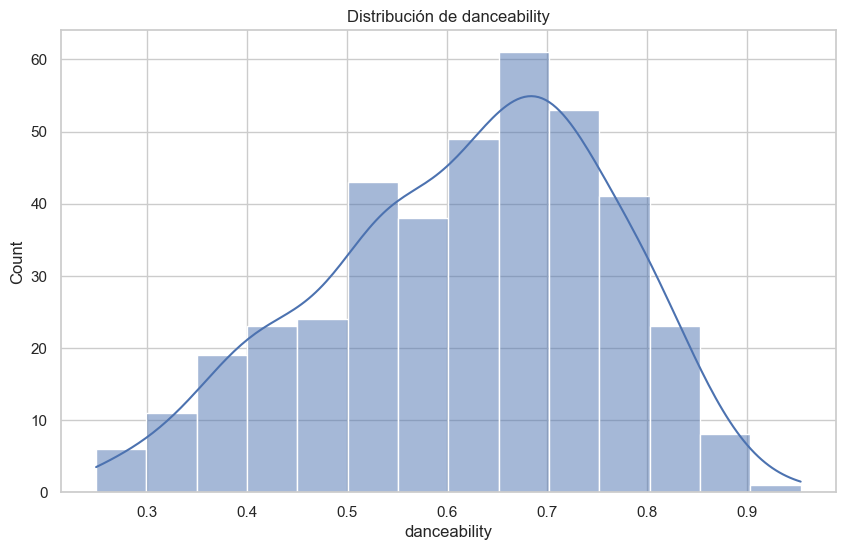

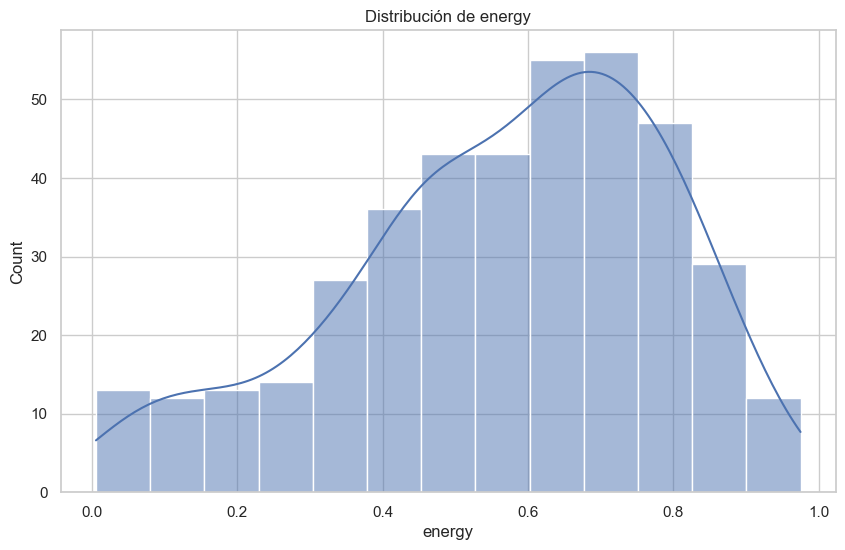

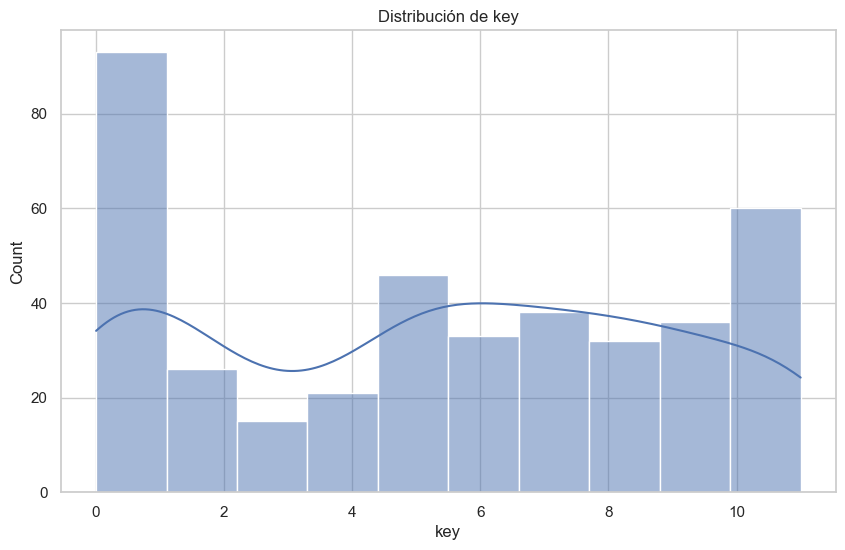

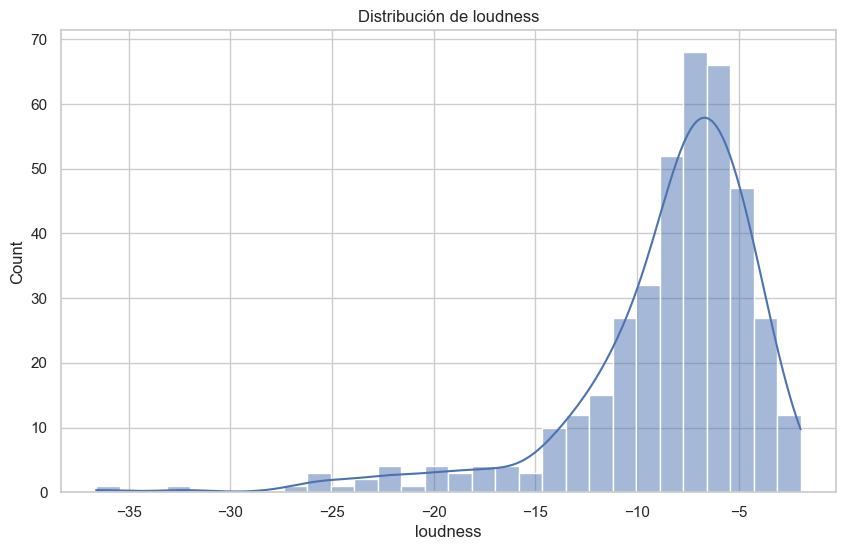

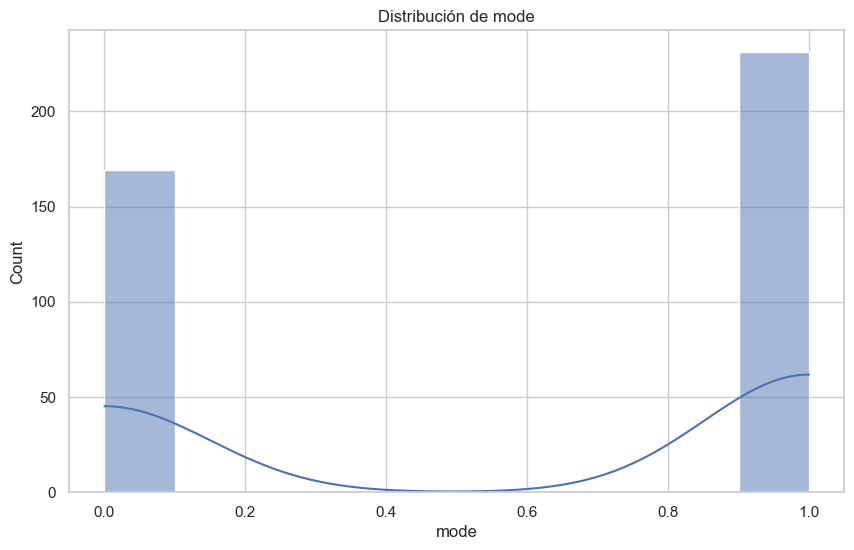

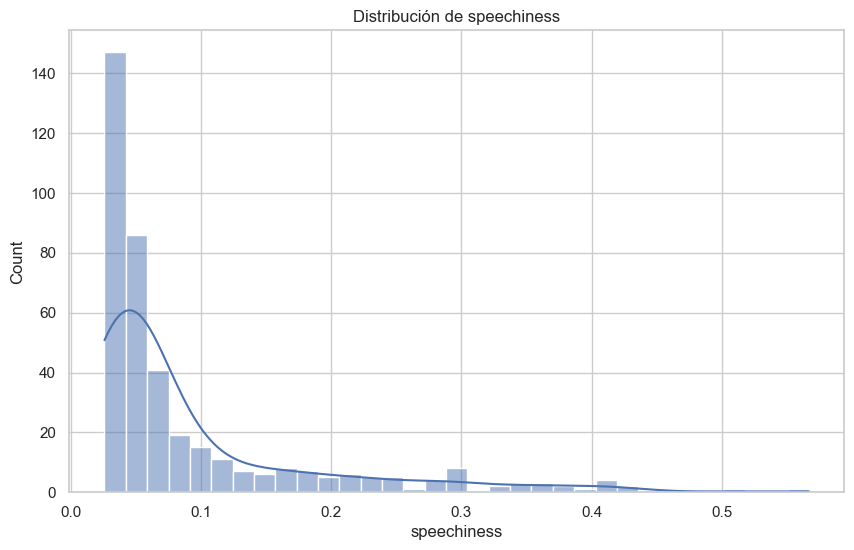

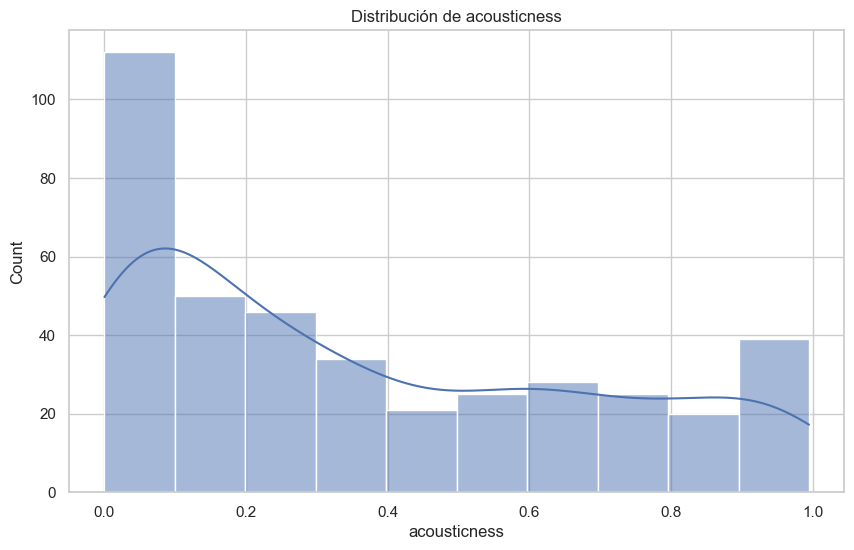

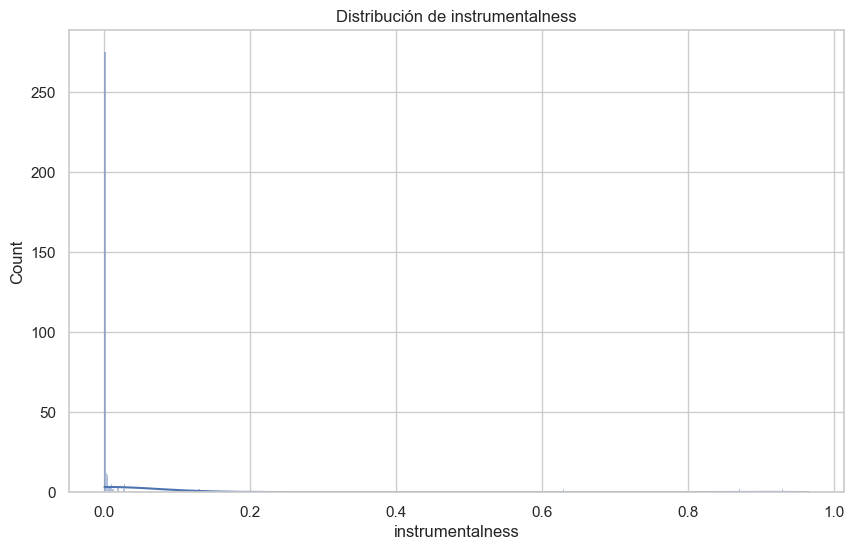

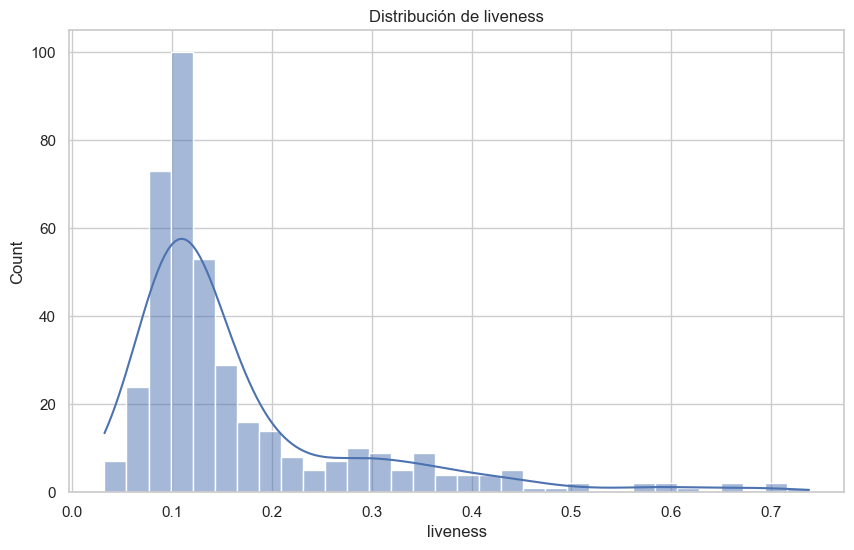

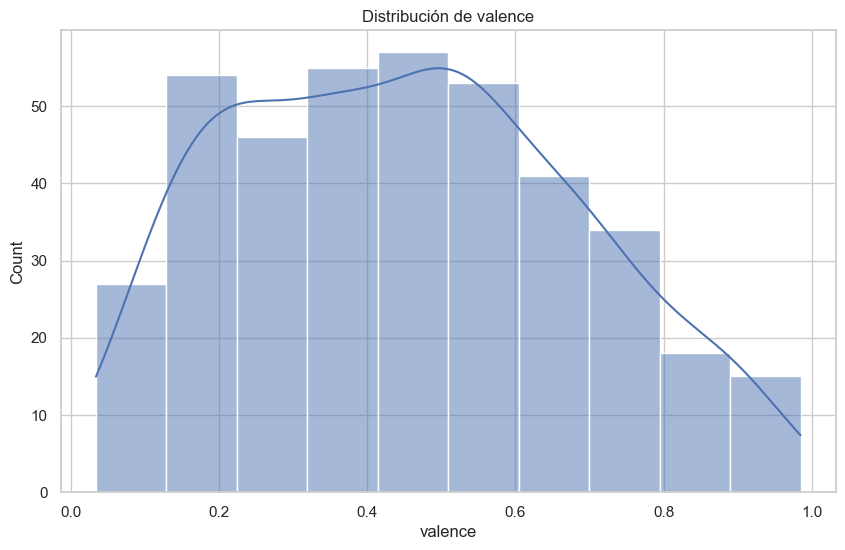

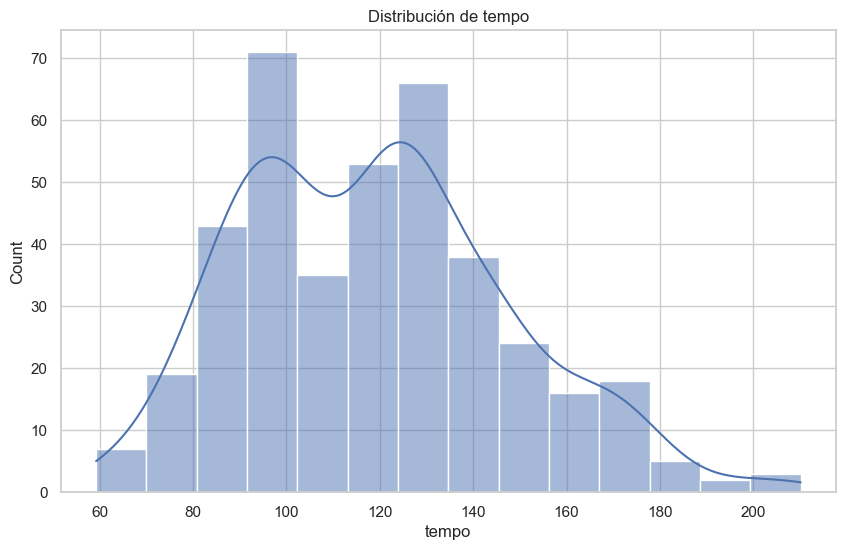

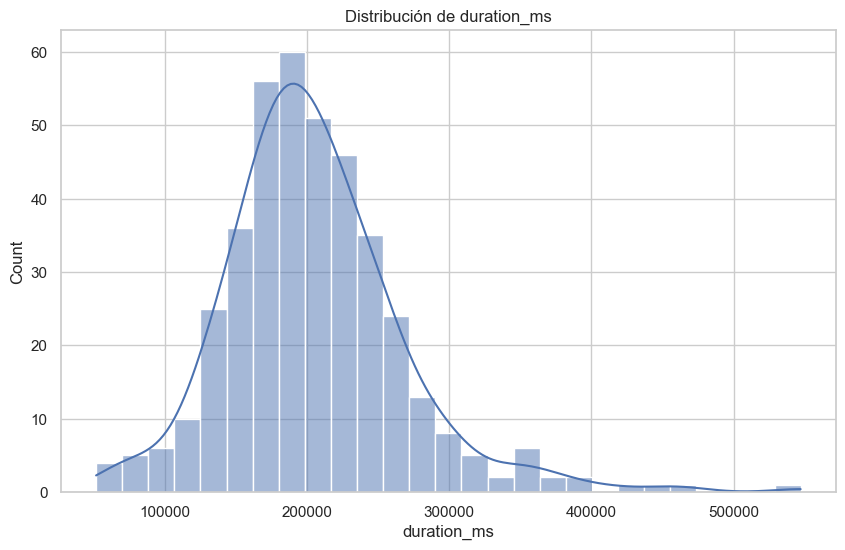

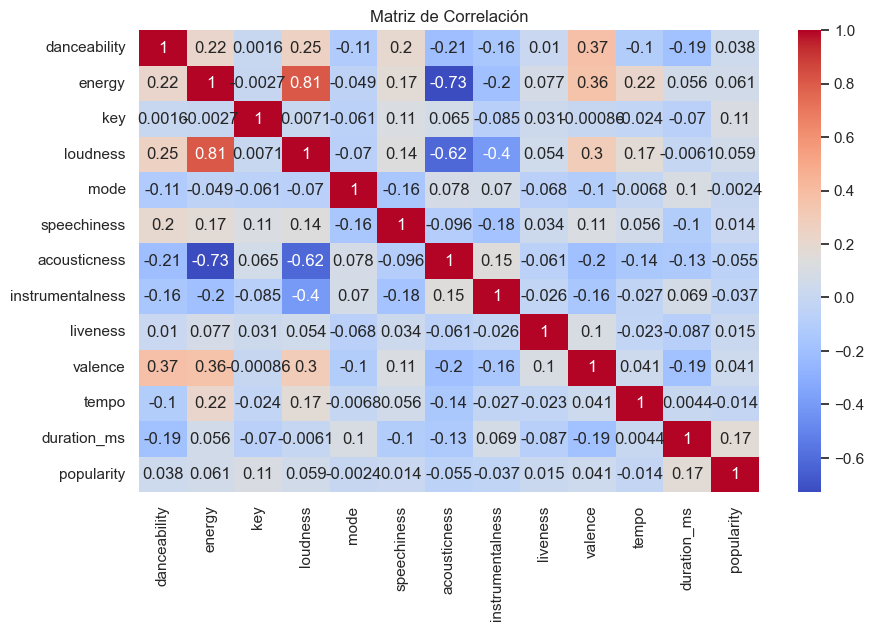

Correlaciones con la popularidad:
 danceability        0.037756
energy              0.061126
key                 0.107722
loudness            0.059068
mode               -0.002357
speechiness         0.014129
acousticness       -0.055322
instrumentalness   -0.036730
liveness            0.014967
valence             0.040898
tempo              -0.014474
duration_ms         0.170228
dtype: float64


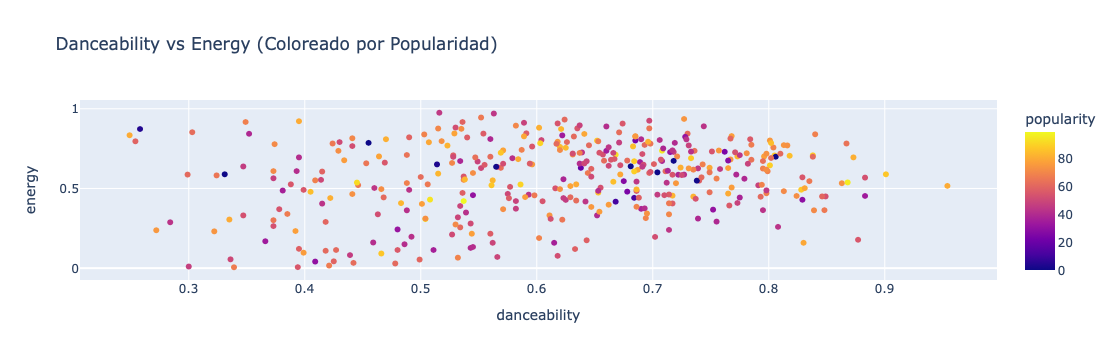

In [6]:
### EDA VARIABLES DEL DF (V.1)


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr

# CONFIGURACIONES INICIALES
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6] 
pd.set_option('display.max_columns', None) 

ruta_archivo = '/Users/cres/final_merged_my_songs_lyrics.csv' 
df = pd.read_csv(ruta_archivo)

features_audio = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                  'speechiness', 'acousticness', 'instrumentalness', 
                  'liveness', 'valence', 'tempo', 'duration_ms']
feature_target = 'popularity' 

# ANÁLISIS DESCRIPTIVO
print(df[features_audio + [feature_target]].describe())

# GRAFICAMOS DISTRIBUCIONES
for feature in features_audio:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribución de {feature}')
    plt.show()

# MATRIZ CORRELACIÓN DE VARIABLES
corr_matrix = df[features_audio + [feature_target]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# CORRELACIÓN CON LA POPULARIDAD
if feature_target in df.columns:
    correlations = df[features_audio].apply(lambda x: pearsonr(x, df[feature_target])[0])
    print("Correlaciones con la popularidad:\n", correlations)

fig = px.scatter(df, x='danceability', y='energy', color=feature_target, 
                 title='Danceability vs Energy (Coloreado por Popularidad)')
fig.show()


Estadísticas descriptivas de 'popularity':
count    1226.000000
mean       75.368679
std        16.945275
min        13.000000
25%        62.000000
50%        79.000000
75%        91.000000
max       100.000000
Name: popularity, dtype: float64


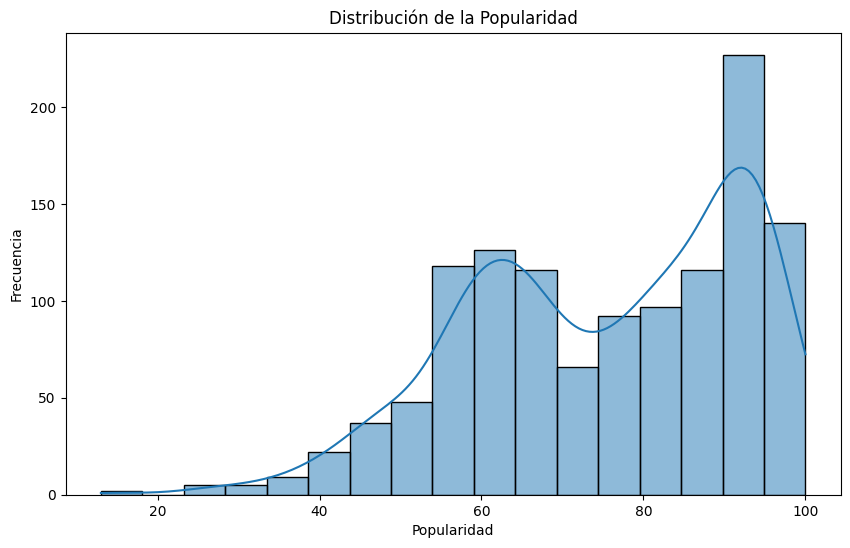

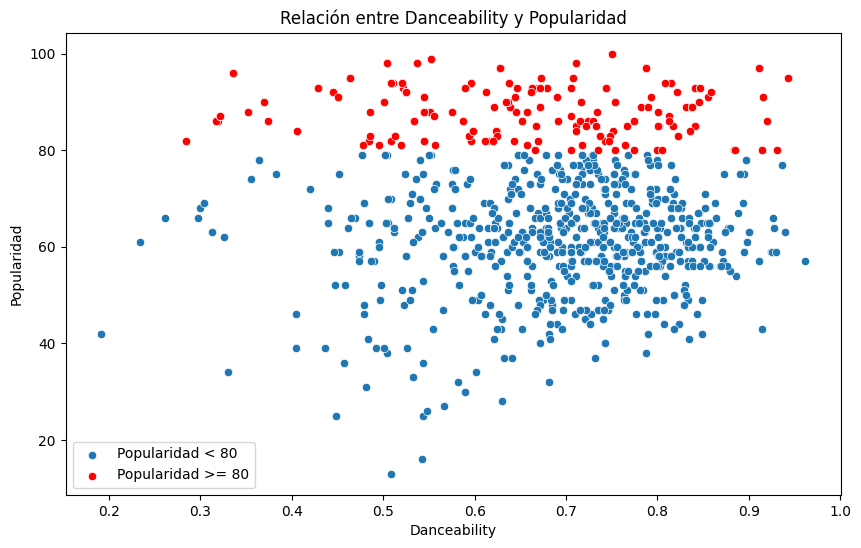

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv')  # Reemplaza con la ruta a tu archivo CSV

print("Estadísticas descriptivas de 'popularity':")
print(df['popularity'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=True)
plt.title('Distribución de la Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

df['popularidad_alta'] = df['popularity'] >= 80

plt.figure(figsize=(10, 6))

sns.scatterplot(x='danceability', y='popularity', data=df[df['popularidad_alta'] == False], label='Popularidad < 80')

sns.scatterplot(x='danceability', y='popularity', data=df[df['popularidad_alta'] == True], color='red', label='Popularidad >= 80')
plt.title('Relación entre Danceability y Popularidad')
plt.xlabel('Danceability')
plt.ylabel('Popularidad')
plt.legend()
plt.show()


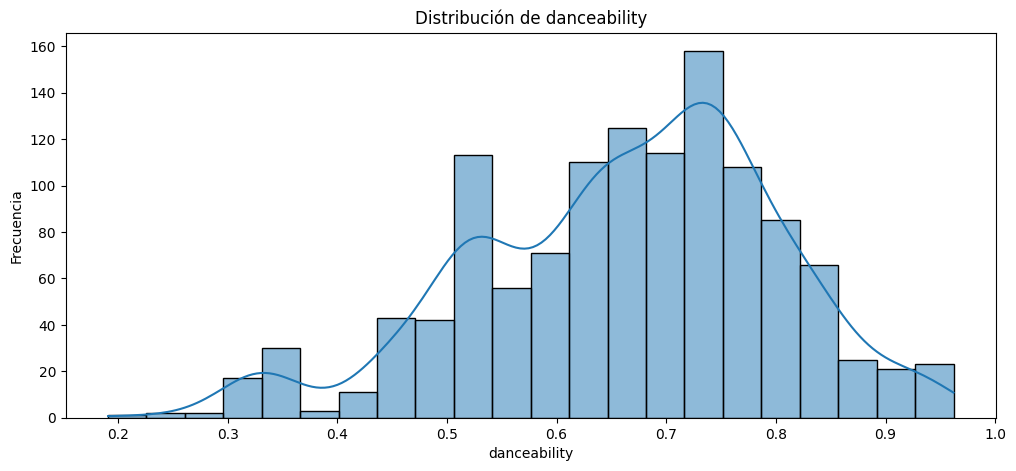

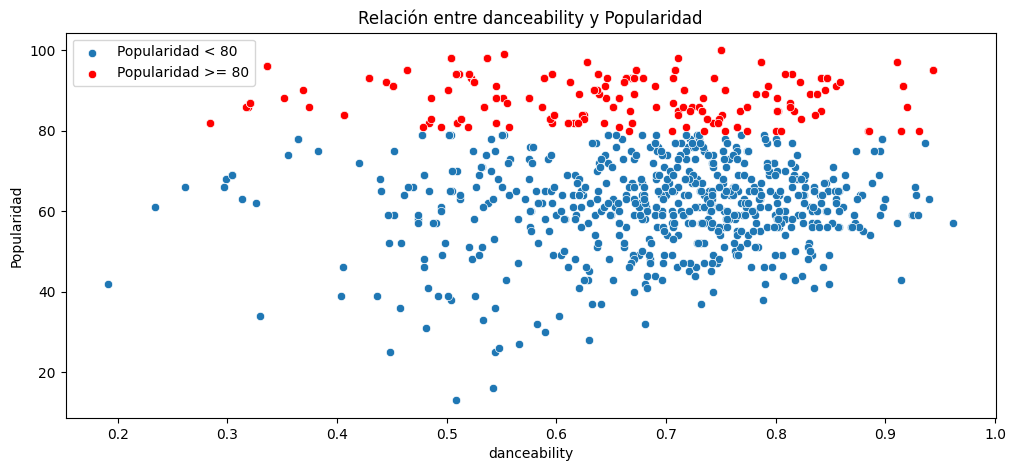

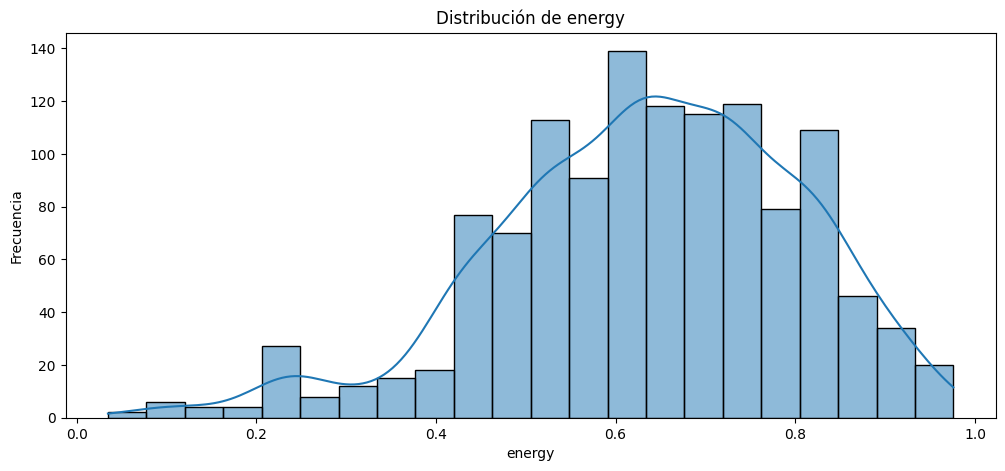

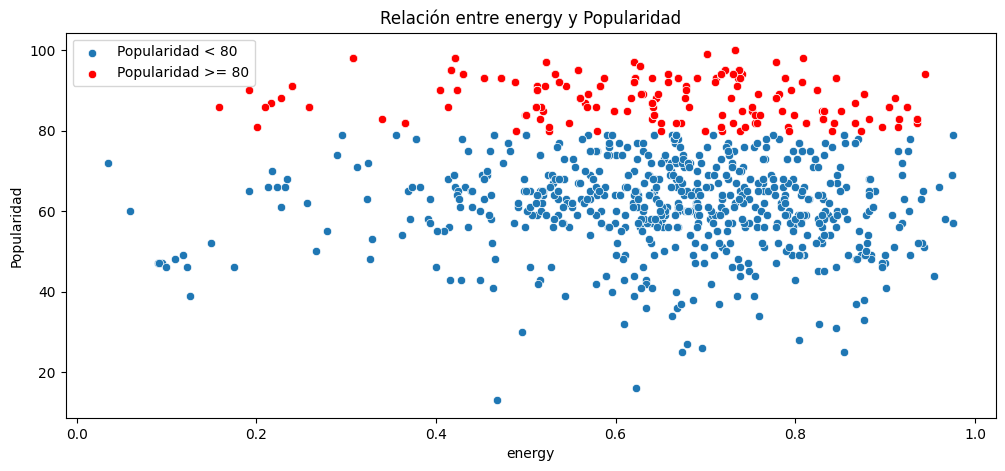

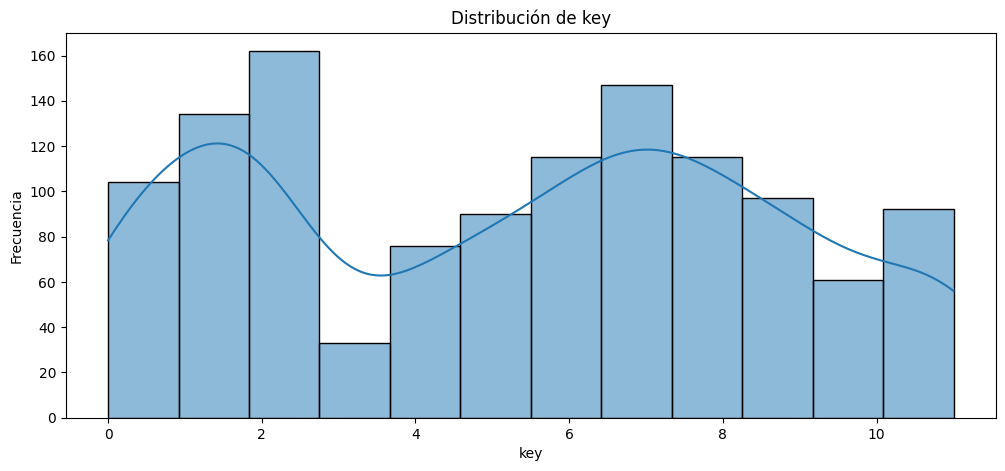

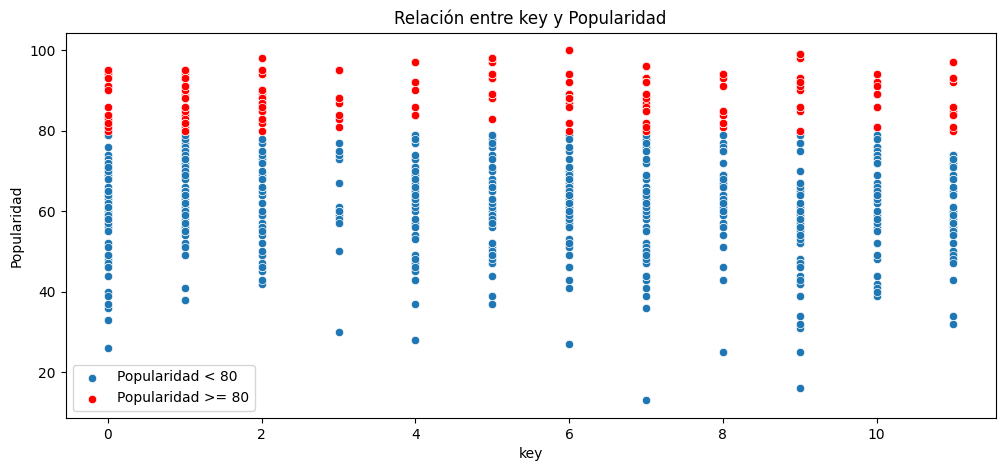

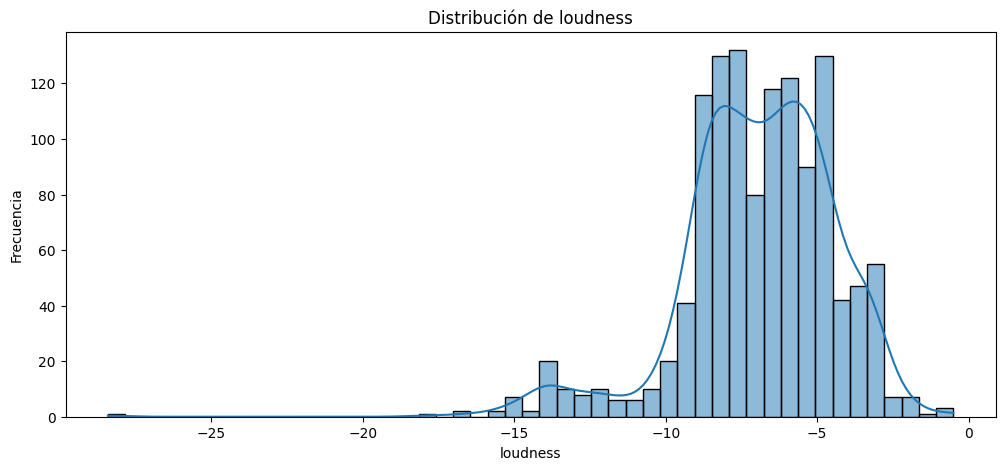

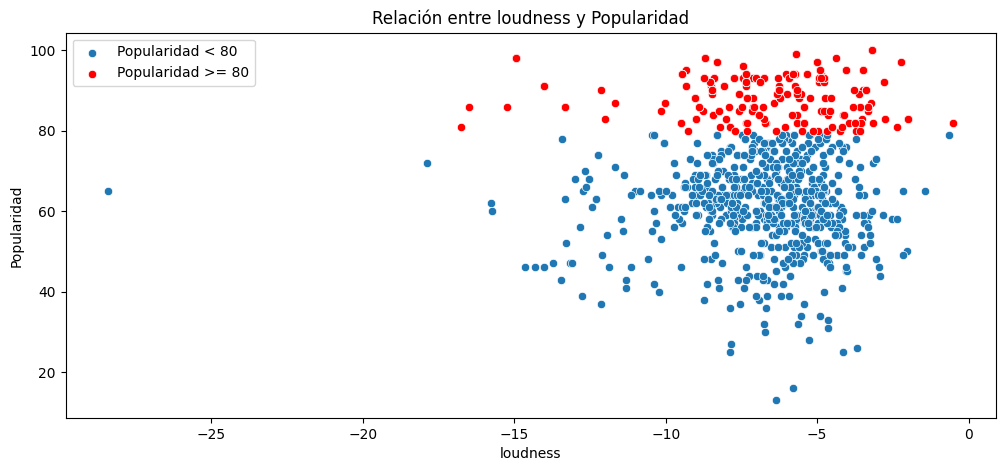

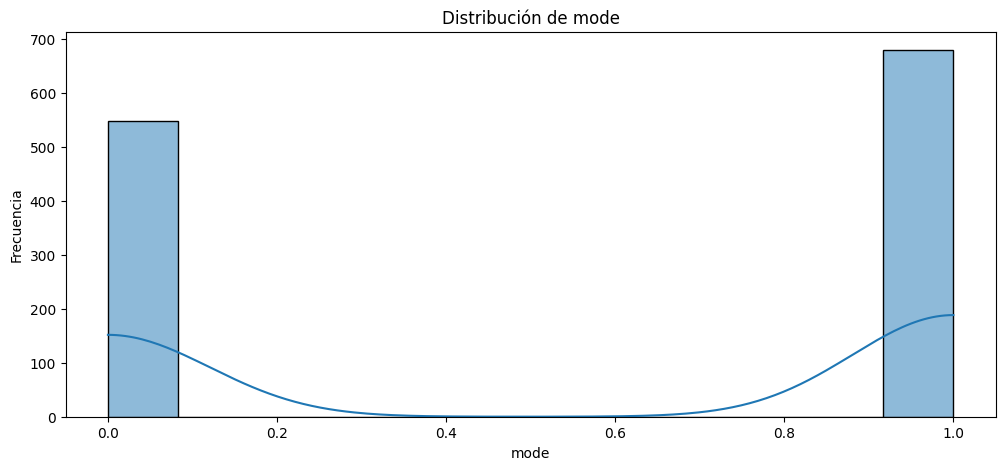

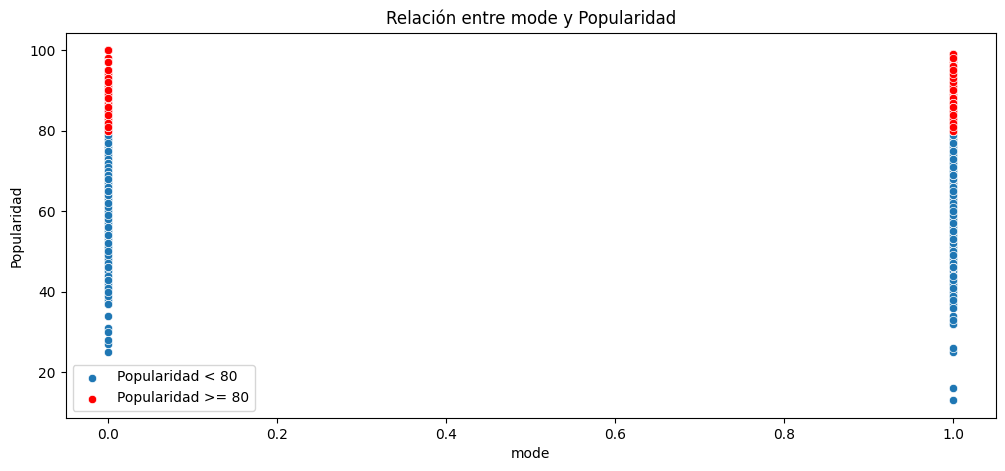

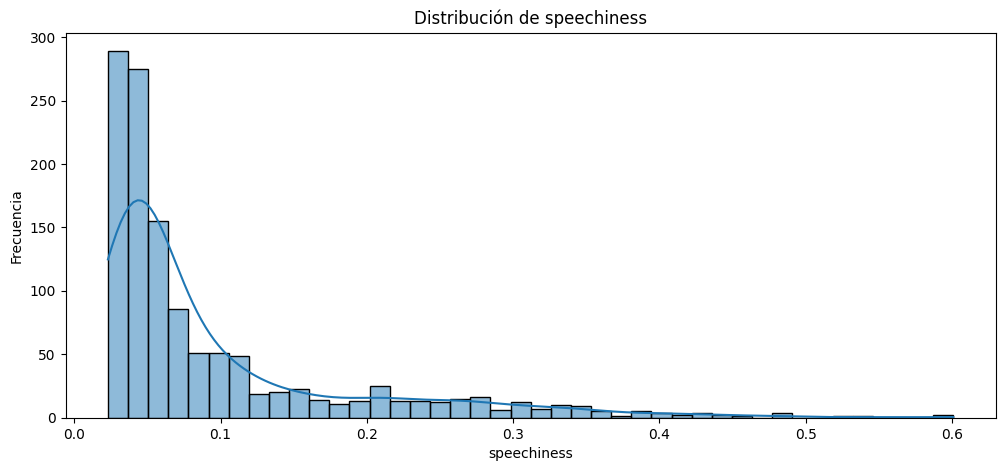

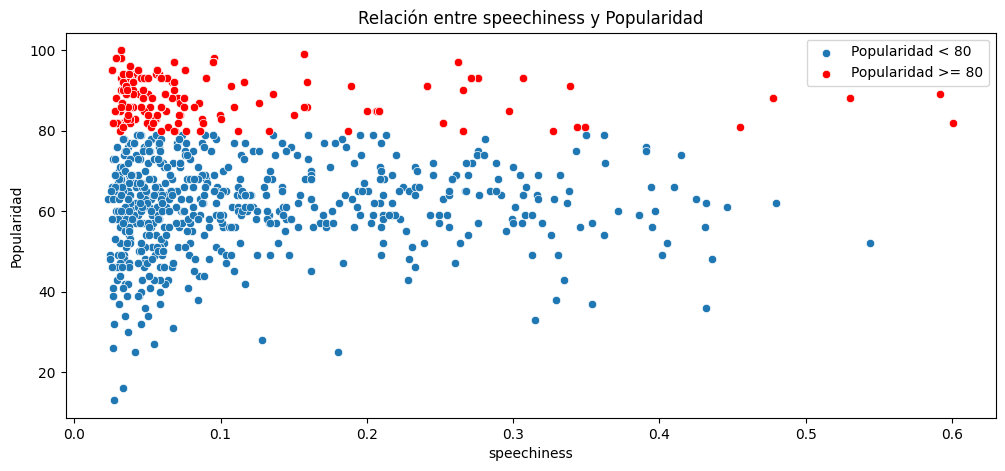

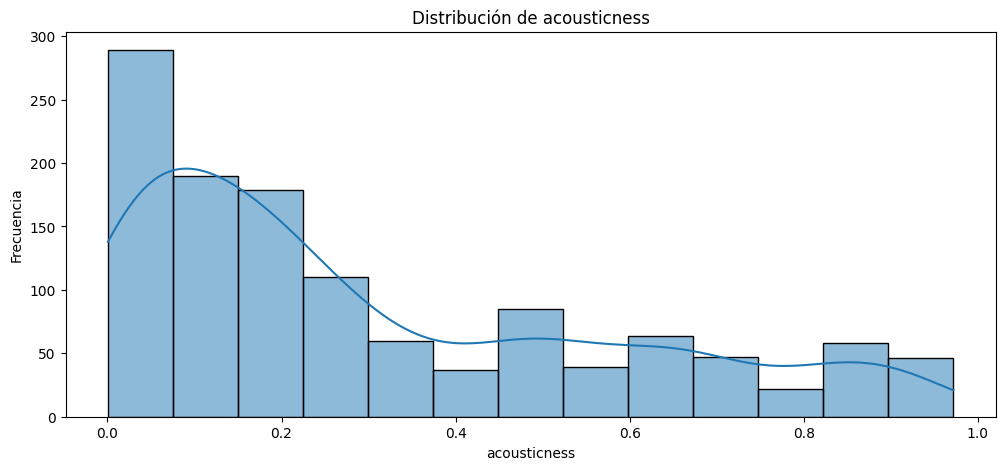

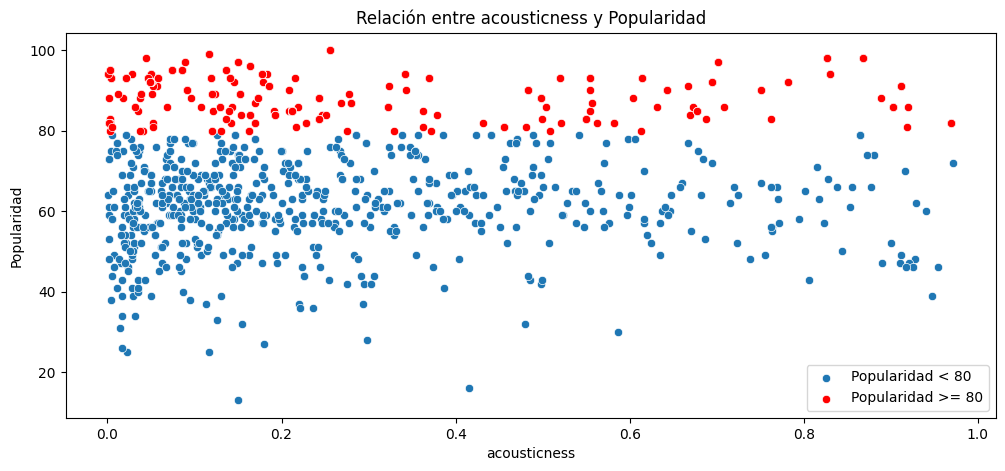

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv') 

df['popularidad_alta'] = df['popularity'] >= 80

variables = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
               'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
               'time_signature', 'followers', 'time_past_since_release', 'duration_ms']

for variable in variables:
    
    plt.figure(figsize=(12, 5))
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

    
    plt.figure(figsize=(12, 5))
    
    sns.scatterplot(x=variable, y='popularity', data=df[df['popularidad_alta'] == False], label='Popularidad < 80')
    
    sns.scatterplot(x=variable, y='popularity', data=df[df['popularidad_alta'] == True], color='red', label='Popularidad >= 80')
    plt.title(f'Relación entre {variable} y Popularidad')
    plt.xlabel(variable)
    plt.ylabel('Popularidad')
    plt.legend()
    plt.show()

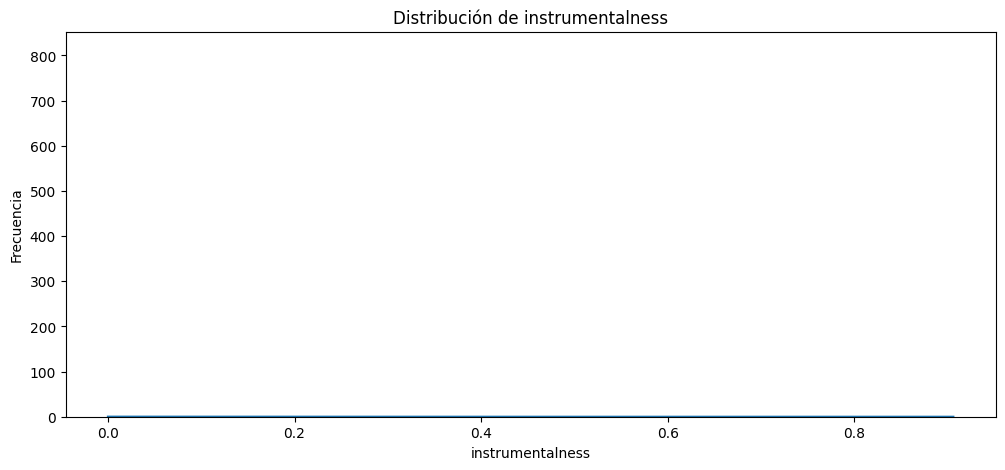

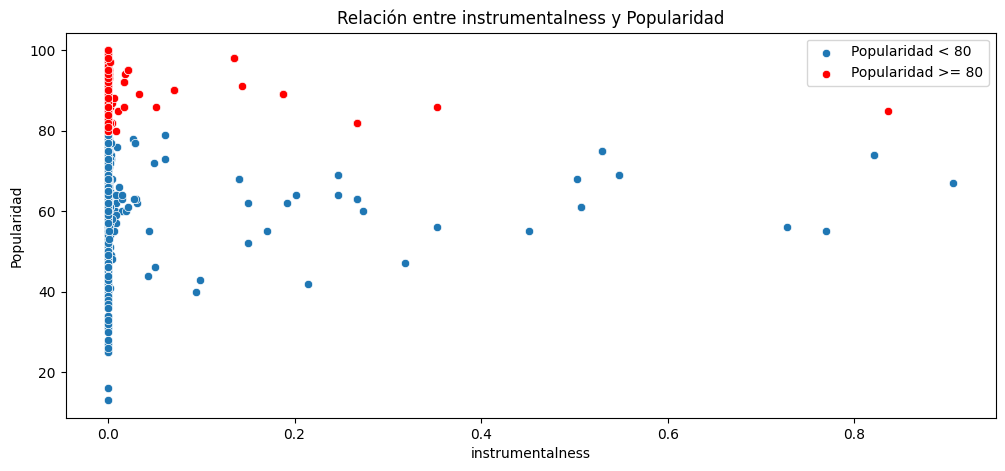

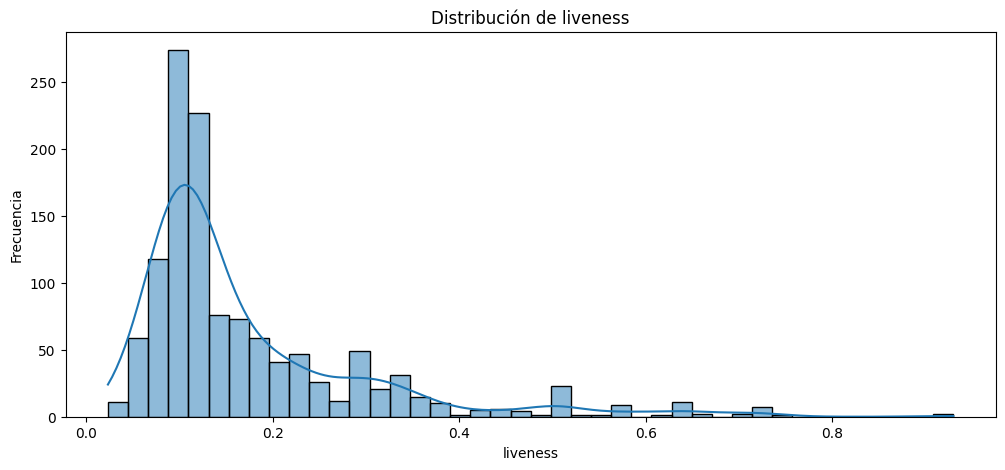

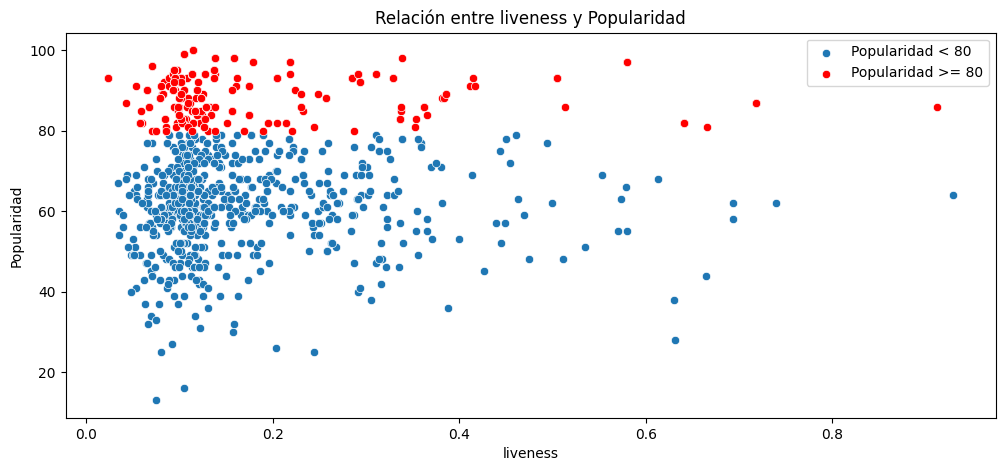

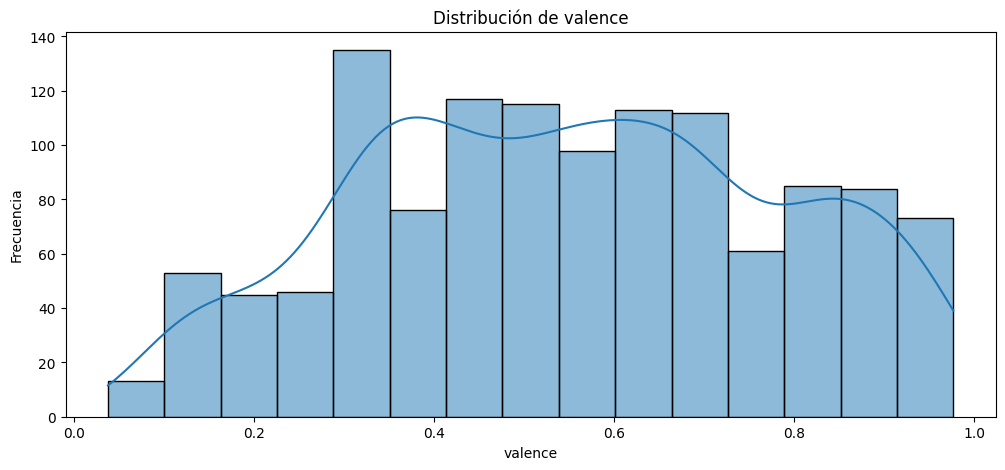

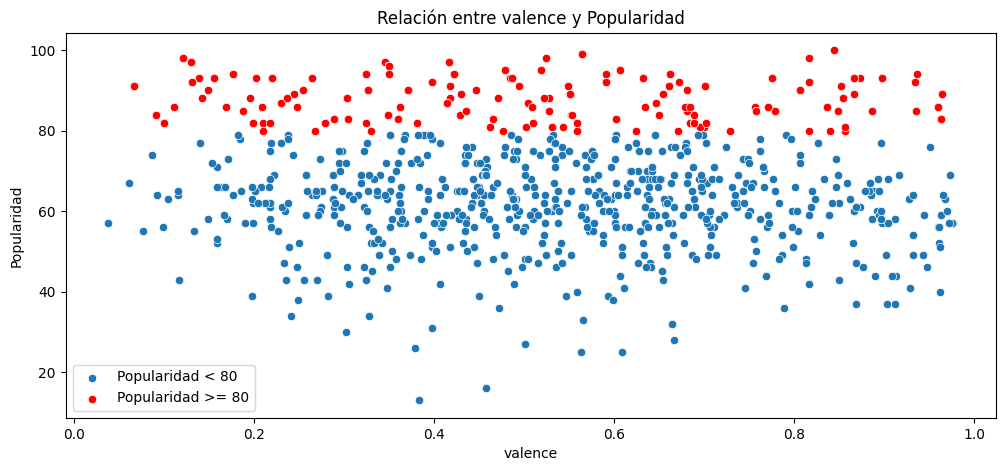

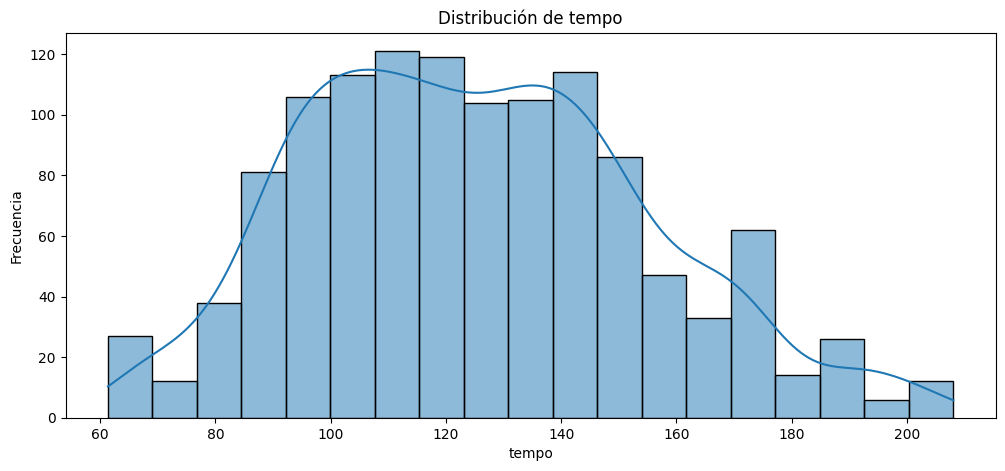

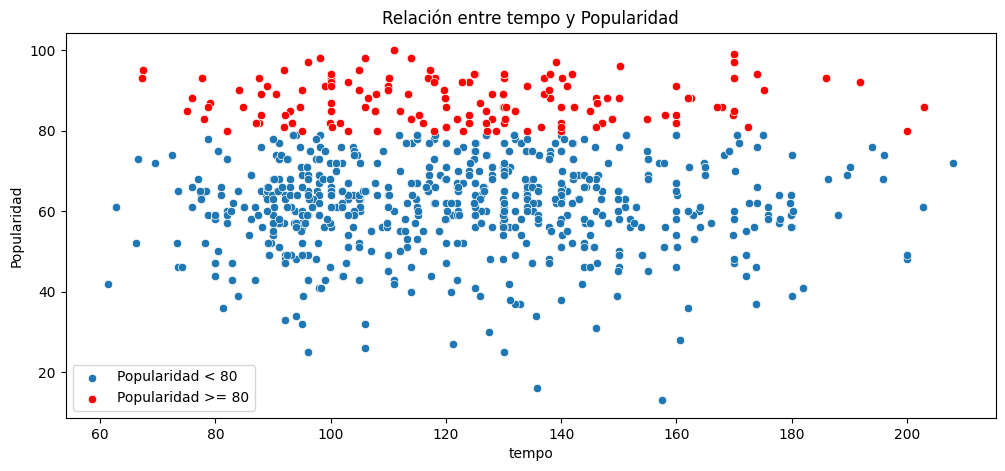

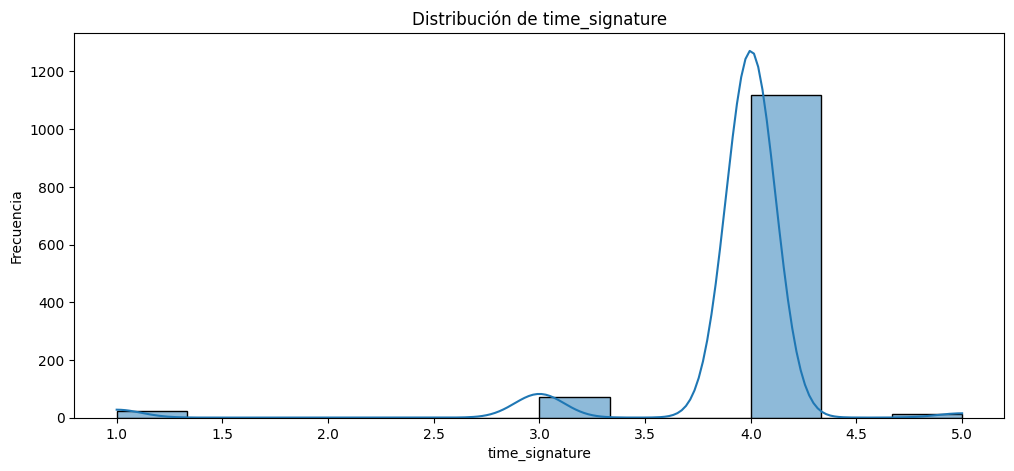

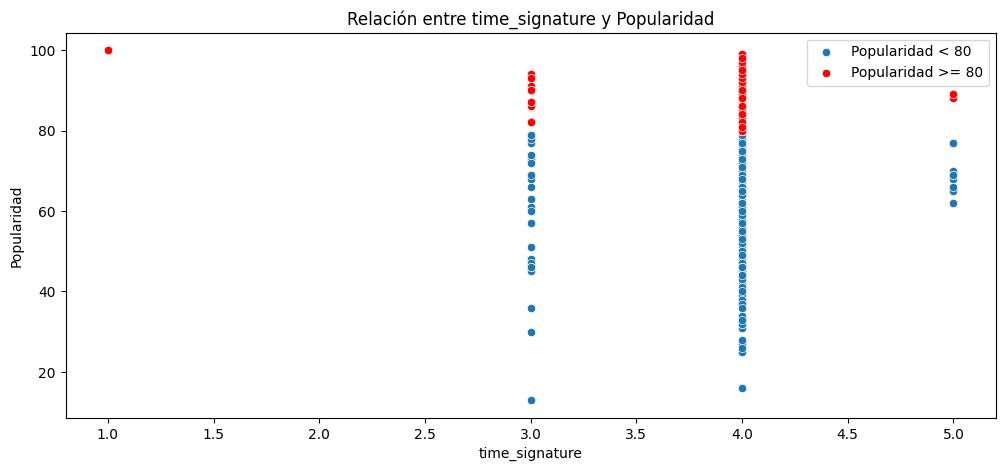

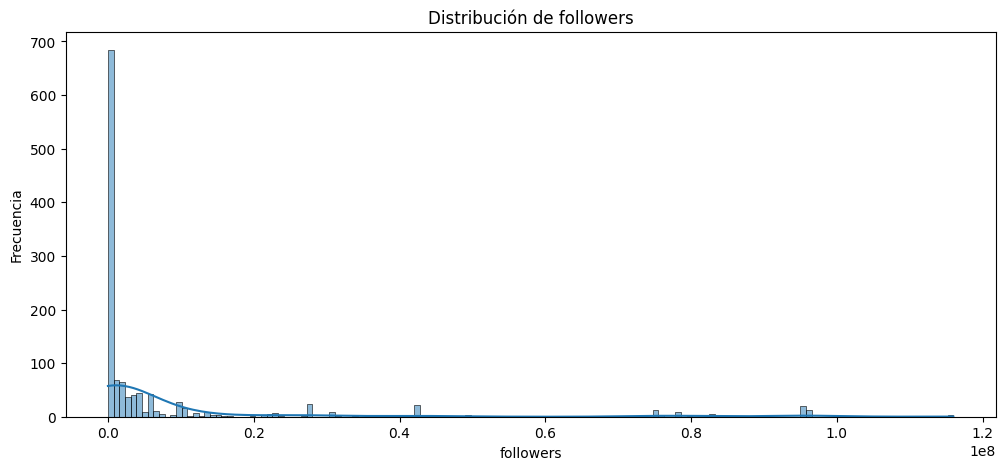

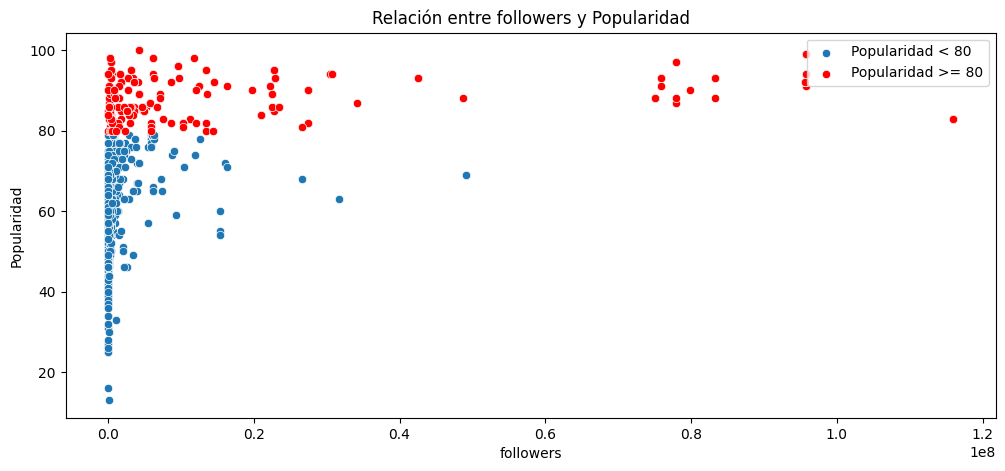

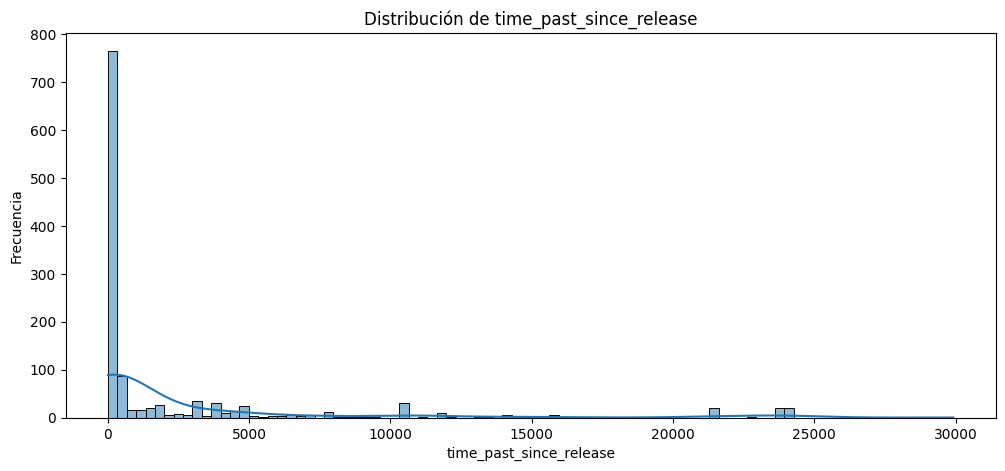

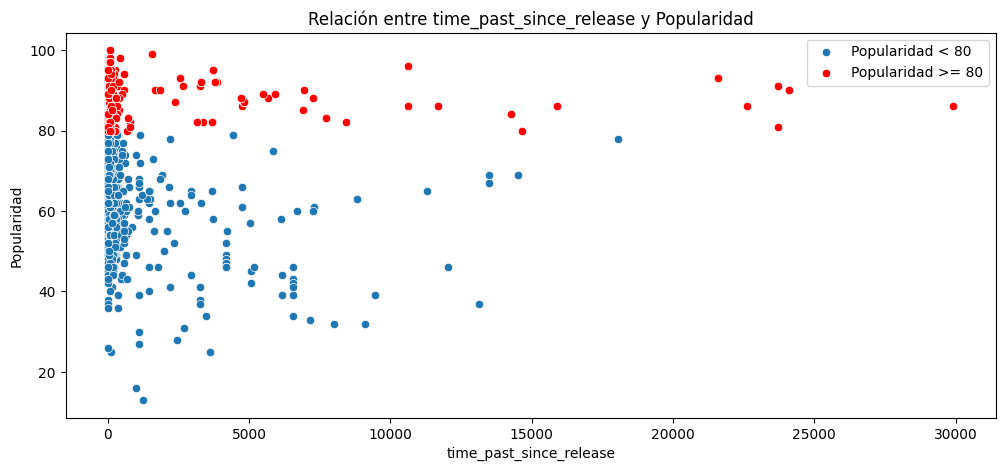

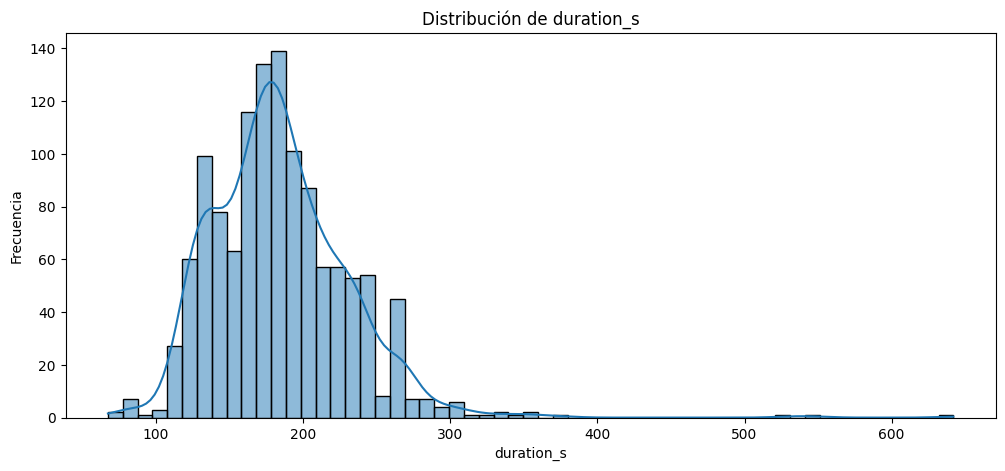

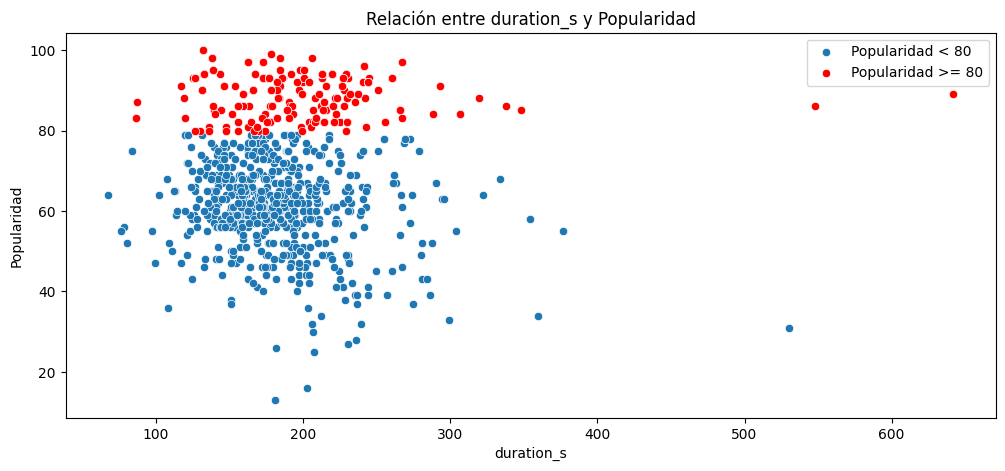

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv') 

df['popularidad_alta'] = df['popularity'] >= 80

variables = ['instrumentalness', 'liveness', 'valence', 'tempo', 
             'time_signature', 'followers', 'time_past_since_release', 'duration_s']

for variable in variables:
    
    plt.figure(figsize=(12, 5))
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

    plt.figure(figsize=(12, 5))
    
    sns.scatterplot(x=variable, y='popularity', data=df[df['popularidad_alta'] == False], label='Popularidad < 80')
    
    sns.scatterplot(x=variable, y='popularity', data=df[df['popularidad_alta'] == True], color='red', label='Popularidad >= 80')
    plt.title(f'Relación entre {variable} y Popularidad')
    plt.xlabel(variable)
    plt.ylabel('Popularidad')
    plt.legend()
    plt.show()


In [9]:
import pandas as pd

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv') 

high_time_signature = df[df['time_signature'] >= 5]
low_time_signature = df[df['time_signature'] <= 1]

print(high_time_signature)
print(low_time_signature)



          country  position                                track_name  \
8         Albania         9                                       Pse   
557      Portugal        14                            Baile do Bruxo   
564      Portugal        21                                Let's Go 4   
588       Germany         5                                  Ja sagen   
618       Germany        35  Thank God It's Christmas - 2011 Remaster   
676        Greece         5                                     Allou   
699        Greece        28                                   DEJA VU   
715        Greece        44                       PROSOPIKA FREESTYLE   
761        Poland        41                        Jestem Twoją Bajką   
801       Denmark        38  Thank God It's Christmas - 2011 Remaster   
1116  Switzerland        18                                  Ja sagen   
1204      Austria        22  Thank God It's Christmas - 2011 Remaster   
1212      Austria        30                        

In [3]:
import pandas as pd

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv') 

high_liveness = df[df['liveness'] >= 0.8]

print(high_liveness)



       country  position             track_name  \
566   Portugal        23  Lapada Dela - Ao Vivo   
1084    Norway        26      Michelin Stjerner   

                                artist_name  danceability  energy  key  \
566   Grupo Menos É Mais, Matheus Fernandes         0.691   0.752    4   
1084                             UNDERGRUNN         0.742   0.882    7   

      loudness  mode  speechiness  ...  time_signature  popularity  listeners  \
566     -6.796     0       0.1570  ...               4          86    3067724   
1084    -3.606     0       0.0997  ...               4          64      63800   

      followers                                   genres  \
566     3089774                ['pagode', 'pagode novo']   
1084      64623  ['norwegian pop rap', 'norwegian trap']   

      time_past_since_release                track_id  genre_category  \
566                       315  4f0aDk7HX37SfzerfznYlr               0   
1084                      232  4KjHgPOIsA8LlMwyAJRlf

In [2]:
import pandas as pd

df = pd.read_csv('/Users/cres/european_countries_top_50_audio_characteristics_updated_final_renamed.csv')

unique_countries = df['country'].unique()

print(unique_countries)


['Albania' 'Bélgica' 'Bulgaria' 'Groenlandia' 'España' 'Estonia'
 'Finlandia' 'Hungría' 'Islandia' 'Eslovaquia' 'Rumanía' 'Irlanda'
 'Croacia' 'Portugal' 'Alemania' 'Italia' 'Grecia' 'Polonia' 'Dinamarca'
 'Reino Unido' 'Suecia' 'Francia' 'Letonia' 'Luxemburgo' 'República Checa'
 'Noruega' 'Suiza' 'Países Bajos' 'Austria']


/var/folders/y4/4wmzlg8x1t13r4nz7l58dk8w0000gn/T/ipykernel_77849/1566066186.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


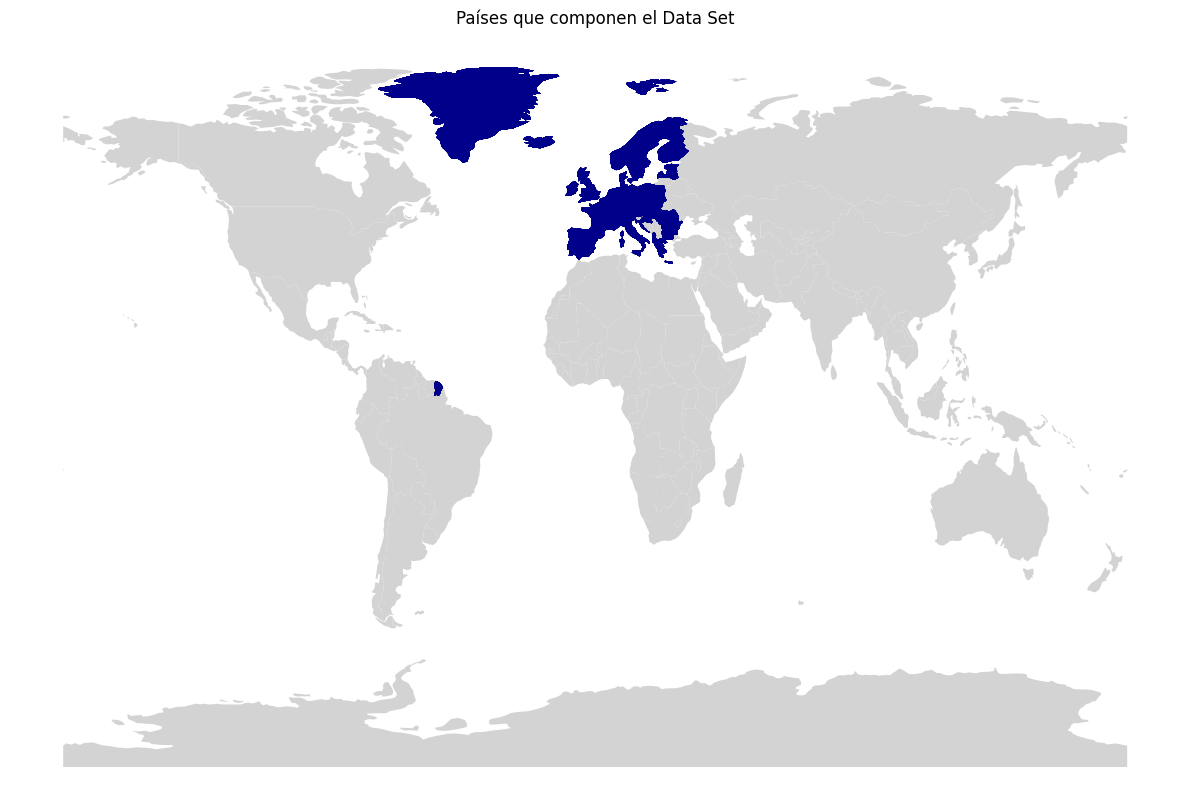

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/cres/european_countries_top_50_audio_characteristics_updated_final_renamed(2).csv')  # Asegúrate de usar la ruta correcta al archivo

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(df, how='left', left_on='name', right_on='country')

fig, ax = plt.subplots(1, figsize=(20, 10))

world.plot(ax=ax, color='lightgrey')

merged.dropna(subset=['country']).plot(ax=ax, color='darkblue')

ax.set_axis_off()

plt.title('Países que componen el Data Set')
plt.show()


In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

df = pd.read_csv('/Users/cres/european_countries_top_50_final.csv') 

numeric_cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                'duration_ms', 'time_signature', 'popularity', 'listeners', 'followers']

df_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce').dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = df_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(len(df_numeric.columns))]

print(vif_data)

             feature         VIF
0       danceability   26.280378
1             energy   38.216545
2                key    3.639359
3           loudness   18.786515
4               mode    2.612790
5        speechiness    2.300731
6       acousticness    3.931897
7   instrumentalness    1.125397
8           liveness    2.989840
9            valence    8.522137
10             tempo   22.117014
11       duration_ms   17.338998
12    time_signature   64.833053
13        popularity   21.958344
14         listeners  173.563965
15         followers  174.153319


In [3]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

df = pd.read_csv('/Users/cres/european_countries_top_50_final.csv') 

predictors = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms', 'time_signature', 'popularity', 'listeners', 'followers',
    'time_past_since_release'
]

def calculate_vif(df, predictors):
    features = "+".join(predictors)

    y, X = dmatrices(f'popularity ~ {features}', data=df, return_type='dataframe')

    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif


vif_by_country = {}
for country in df['country'].unique():
    country_df = df[df['country'] == country].dropna()
    vif = calculate_vif(country_df, predictors)
    vif_by_country[country] = vif


example_country = list(df['country'].unique())[0]
print(vif_by_country[example_country])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


       VIF Factor                 features
0     1651.117287                Intercept
1        2.400407             danceability
2        2.412892                   energy
3        1.467511                      key
4        1.875745                 loudness
5        1.426028                     mode
6        1.688327              speechiness
7        1.619192             acousticness
8        1.401455         instrumentalness
9        1.537370                 liveness
10       1.535689                  valence
11       1.668573                    tempo
12       1.448329              duration_ms
13       1.657949           time_signature
14       2.227215               popularity
15  182422.684928                listeners
16  182621.421206                followers
17       1.426516  time_past_since_release


In [4]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

df = pd.read_csv('/Users/cres/european_countries_top_50_final.csv') 

predictors = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms', 'time_signature', 'popularity', 'followers',
    'time_past_since_release'
]

def calculate_vif(df, predictors):
    features = "+".join(predictors)
   
    y, X = dmatrices(f'popularity ~ {features}', data=df, return_type='dataframe')
   
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

vif_by_country = {}
for country in df['country'].unique():
    country_df = df[df['country'] == country].dropna()
    vif = calculate_vif(country_df, predictors)
    vif_by_country[country] = vif

example_country = list(df['country'].unique())[0]
print(f"VIF para {example_country}:\n", vif_by_country[example_country])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF para Albania:
      VIF Factor                 features
0   1621.946595                Intercept
1      2.128320             danceability
2      2.392468                   energy
3      1.413702                      key
4      1.873933                 loudness
5      1.421670                     mode
6      1.675009              speechiness
7      1.580545             acousticness
8      1.390729         instrumentalness
9      1.536832                 liveness
10     1.533140                  valence
11     1.618026                    tempo
12     1.375433              duration_ms
13     1.622997           time_signature
14     1.824026               popularity
15     1.804984                followers
16     1.412323  time_past_since_release


In [12]:
import pandas as pd
from collections import Counter

df = pd.read_csv('/Users/cres/european_countries_top_50_final.csv') 

def clean_and_count_genres(genre_string):
    exclude_words = [
        'Albanian', 'Belgian', 'Bulgarian', 'Greenlandic', 'Spanish', 'Estonian', 
        'Finnish', 'Hungarian', 'Icelandic', 'Slovak', 'Romanian', 'Irish', 
        'Croatian', 'Portuguese', 'German', 'Italian', 'Greek', 'Polish', 'Danish', 
        'British', 'Swedish', 'French', 'Latvian', 'Luxembourgish', 'Czech', 
        'Norwegian', 'Swiss', 'Dutch', 'Austrian', # Añade más si es necesario
    ]

    genres = []
    if pd.isna(genre_string):
        return genres
    genre_list = genre_string.split(',')
    for genre in genre_list:
        words = genre.strip().split(' ')
        filtered_genre = ' '.join([word for word in words if word not in exclude_words])
        if filtered_genre:
            genres.append(filtered_genre.strip())
    return genres

all_genres = []
for genres in df['genres'].apply(clean_and_count_genres):
    all_genres.extend(genres)

genre_counts = Counter(all_genres)

for genre, count in genre_counts.most_common():
    print(f"{genre}: {count}")

unique_genres_count = len(genre_counts)
print(f"Total de géneros únicos: {unique_genres_count}")


[]: 130
'pop']: 74
'pop': 65
['dance pop': 64
['adult standards': 59
['pop']: 44
'easy listening': 44
'urbano latino']: 43
'lounge': 40
'rap']: 33
['alt z': 32
'trap latino': 31
'rockabilly']: 30
['french hip hop': 29
'czsk hip hop']: 28
'greek trap']: 27
'uk pop']: 27
['bulgarian pop': 27
'urban contemporary']: 26
'pop rap': 26
'soft rock']: 24
'canadian pop': 24
['italian hip hop': 24
'italian pop': 24
['albanian hip hop': 23
['new romantic': 23
'new wave pop': 23
['australian dance': 23
'australian pop': 23
'pop urbaine': 22
['singer-songwriter pop']: 21
'chalga']: 21
'vocal jazz']: 20
['greek hip hop': 20
'lounge']: 19
['reggaeton': 19
['hungarian hip hop': 17
'rock']: 17
['deep underground hip hop': 16
'kentucky hip hop': 16
['finnish dance pop': 16
['hungarian pop']: 15
['classic rock': 15
['albanian pop']: 14
'jazz pop': 14
'talent show']: 14
['canadian pop': 14
'icelandic pop': 14
['romanian trap']: 14
'albanian pop': 13
'hip hop': 13
['czech pop': 13
['hip hop tuga']: 13
'koso

In [8]:
import pandas as pd

df = pd.read_csv('/Users/cres/european_countries_top_50_final.csv')

genre_mappings = {
    'pop': ['pop'],
    'hip hop': ['rap', 'hip hop'],
    'electronic': ['electra', 'float house', 'garage rock', 'sheffield indie', 'drum and bass', 'tech trance', 'electro', 'eurodance', 'house', 'edm'],
    'rock': ['alternative rock', 'dance rock', 'pop rock', 'album rock', 'classic rock', 'soft rock', 'yacht rock'],
    'jazz': ['vocal jazz'],
    'funk': ['funk'],
    'folk': ['folk-pop', 'folk rock'],
    'soul': ['soul'],
    'swing': ['swing'],
    'tekk': ['tekk'],
    'metal': ['metal'],
    'kinder': ['kinder'],
    'levenslied': ['levenslied'],
    'singer-songwriter': ['singer-songwriter'],
    'lustrum': ['lustrum'],
    'hardstyle': ['hardstyle'],
    'big room': ['big room'],
    'carnaval': ['carnaval']
}

def categorize_genre(genre_string, genre_mappings):
    """Categoriza un género musical según el mapeo definido"""
    if pd.isna(genre_string) or genre_string == "[]":
        return 'NA'
    genre_string = genre_string.lower()
    for main_genre, keywords in genre_mappings.items():
        if any(keyword in genre_string for keyword in keywords):
            return main_genre
    return 'other'

df['genre_category'] = df['genres'].apply(lambda x: categorize_genre(x, genre_mappings))

print(df['genre_category'].value_counts())


genre_category
pop                  684
hip hop              234
NA                   130
other                102
jazz                  20
rock                  17
electronic            16
singer-songwriter     11
funk                   4
kinder                 2
folk                   1
tekk                   1
metal                  1
lustrum                1
hardstyle              1
levenslied             1
Name: count, dtype: int64


In [14]:

df_other = df[df['genre_category'] == 'other']


unique_other_genres = set()
for genres in df_other['genres']:

    genres_list = genres.split(',')
    unique_other_genres.update(genres_list)

print(f"Total de géneros únicos en 'other': {len(unique_other_genres)}")
print("Géneros en 'other':")
print(unique_other_genres)


Total de géneros únicos en 'other': 64
Géneros en 'other':
{"['funk mandelao']", "['tekk']", " 'pov: indie']", "['gen z singer-songwriter']", "['drill francais']", " 'stomp and holler']", " 'corridos tumbados'", " 'barnsagor']", "['barnmusik'", " 'slovak rock']", "['muziek voor kinderen']", "['flamenco urbano'", "['glam rock'", " 'easy listening'", " 'sierreno']", " 'urbano espanol']", "['memphis phonk']", "['manele']", "['schlager']", "['covertronica']", "['entehno'", " 'funk paulista'", "['corridos tumbados'", "['finnish drill']", " 'mellow gold'", " 'lounge'", "['klubowe']", " 'rockabilly']", " 'sad sierreno'", "['russelater']", "['kleinkunst']", "['glam rock']", "['pagode'", " 'sad sierreno']", "['lustrum']", " 'lounge']", "['kindermusik']", " 'piano rock'", "['pov: indie']", "['drill espanol'", "['musical advocacy']", " 'vocal jazz']", "['modern folk rock']", " 'funk rj']", " 'laiko']", " 'rock']", "['barnmusik']", "['nederlandse hardstyle']", " 'levenslied']", "['carnaval'", "['f

In [7]:
import pandas as pd

df = pd.read_csv('/Users/cres/european_countries_top_50_final.csv')

genre_mappings = {
    'pop': ['pop'],
    'hip hop': ['rap', 'hip hop', 'drill francais', 'memphis phonk', 'finnish drill', 'drill espanol', 'greek drill'],
    'jazz': ['vocal jazz'],
    'rock': ['rock', 'slovak rock', 'glam rock', 'rockabilly', 'piano rock', 'czech rock', 'brooklyn indie'],
    'electronic': ['electra', 'float house', 'garage rock', 'sheffield indie', 'drum and bass', 'tech trance', 'electro', 'eurodance', 'house', 'edm'],
    'singer-songwriter': ['gen z singer-songwriter', 'modern folk rock'],
    'funk': ['funk mandelao', 'funk paulista', 'funk rj', 'funk 150 bpm', 'rave funk', 'funk carioca'],
    'kinder': ['kinder', 'barnsagor', 'barnmusik', 'muziek voor kinderen', 'kindermusik'],
    'folk': ['stomp and holler', 'indie folk'],
    'tekk': ['tekk'],
    'metal': ['metal'],
    'lustrum': ['lustrum'],
    'hardstyle': ['nederlandse hardstyle'],
    'levenslied': ['levenslied'],
    'latin': ['corridos tumbados', 'sierreno', 'sad sierreno', 'urbano espanol', 'corrido', 'flamenco urbano'],
    'easy listening': ['easy listening', 'mellow gold', 'lounge'],
    'regional': ['manele', 'schlager', 'entehno', 'laiko'],
    'alternative': ['pov: indie', 'kleinkunst', 'musical advocacy', 'scenecore'],
    'urban': ['flamenco urbano', 'pagode', 'pagode novo', 'agronejo', 'covertronica', 'russelater'],
}

def categorize_genre(genre_string, genre_mappings):
    """Categoriza un género musical según el mapeo definido"""
    if pd.isna(genre_string) or genre_string == "[]":
        return 'NA'
    genre_string = genre_string.lower()
    for main_genre, keywords in genre_mappings.items():
        if any(keyword in genre_string for keyword in keywords):
            return main_genre
    return 'other'

df['genre_category'] = df['genres'].apply(lambda x: categorize_genre(x, genre_mappings))

print(df['genre_category'].value_counts())


genre_category
pop                  684
hip hop              245
NA                   130
rock                  51
jazz                  20
regional              16
alternative           14
electronic            13
singer-songwriter     11
folk                   9
urban                  7
kinder                 5
easy listening         5
funk                   4
other                  4
latin                  4
tekk                   1
lustrum                1
hardstyle              1
levenslied             1
Name: count, dtype: int64


Conteo total de cada género:
main_genre
pop                  684
hip hop              245
NA                   130
rock                  51
jazz                  20
regional              16
alternative           14
electronic            13
singer-songwriter     11
folk                   9
urban                  7
kinder                 5
easy listening         5
funk                   4
other                  4
latin                  4
tekk                   1
lustrum                1
hardstyle              1
levenslied             1
Name: count, dtype: int64


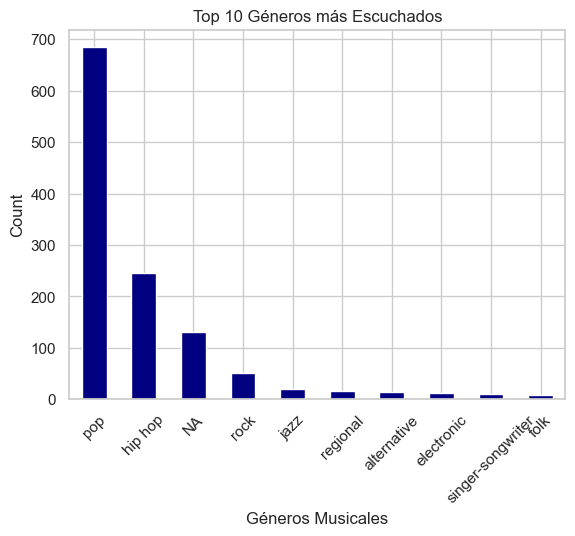

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

genre_mappings = {
    'pop': ['pop'],
    'hip hop': ['rap', 'hip hop', 'drill francais', 'memphis phonk', 'finnish drill', 'drill espanol', 'greek drill', 'trap boricua', 'french hip hop', 'argentine hip hop', 'rap canario', 'albanian hip hop'],
    'jazz': ['vocal jazz'],
    'rock': ['rock', 'slovak rock', 'glam rock', 'rockabilly', 'piano rock', 'czech rock', 'brooklyn indie'],
    'electronic': ['electra', 'float house', 'garage rock', 'sheffield indie', 'drum and bass', 'tech trance', 'electro', 'eurodance', 'house', 'edm'],
    'singer-songwriter': ['gen z singer-songwriter', 'modern folk rock'],
    'funk': ['funk mandelao', 'funk paulista', 'funk rj', 'funk 150 bpm', 'rave funk', 'funk carioca'],
    'kinder': ['kinder', 'barnsagor', 'barnmusik', 'muziek voor kinderen', 'kindermusik'],
    'folk': ['stomp and holler', 'indie folk'],
    'tekk': ['tekk'],
    'metal': ['metal'],
    'lustrum': ['lustrum'],
    'hardstyle': ['nederlandse hardstyle'],
    'levenslied': ['levenslied'],
    'latin': ['corridos tumbados', 'sierreno', 'sad sierreno', 'urbano espanol', 'corrido', 'reggaeton'],
    'easy listening': ['easy listening', 'mellow gold', 'lounge'],
    'regional': ['manele', 'schlager', 'entehno', 'laiko'],
    'alternative': ['pov: indie', 'kleinkunst', 'musical advocacy', 'scenecore'],
    'urban': ['flamenco urbano', 'pagode', 'pagode novo', 'agronejo', 'covertronica', 'russelater'],
}

def categorize_genre(genre_string, genre_mappings):
    """Categoriza un género musical según el mapeo definido"""
    if pd.isna(genre_string) or genre_string == "[]":
        return 'NA'
    genre_string = genre_string.lower()
    found_genres = []
    for main_genre, keywords in genre_mappings.items():
        if any(keyword in genre_string for keyword in keywords):
            found_genres.append(main_genre)
    if not found_genres:
        return 'other'
    genre_count = Counter(found_genres)
    return genre_count.most_common(1)[0][0]


df = pd.read_csv('/Users/cres/european_countries_top_50_final.csv') 

df['main_genre'] = df['genres'].apply(lambda x: categorize_genre(x, genre_mappings))

total_genre_counts = df['main_genre'].value_counts()

print("Conteo total de cada género:")
print(total_genre_counts)

sns.set(style="whitegrid")
genre_counts = total_genre_counts.head(10)  

genre_counts.plot(kind='bar', color='navy')  
plt.xlabel('Géneros Musicales')
plt.ylabel('Count')
plt.title('Top 10 Géneros más Escuchados')
plt.xticks(rotation=45)
plt.show()



In [9]:
def categorize_genre(main_genre):
    """Categoriza un género musical, asignando 0 por defecto y 1 a 'pop', 'hip hop' o 'rap'."""
    if main_genre == [] or main_genre == 'NA':
        return 0
    elif 'pop' in main_genre or 'hip hop' in main_genre or 'rap' in main_genre:
        return 1
    return 0

In [10]:
df['genre_category'] = df['main_genre'].apply(categorize_genre)

In [13]:
## COMPROBACIÓN DE QUE NO HAY VALORES NULOS, NO DEVUELVE RESULTADO
missing_genre_values = df[df['genre_category'].isnull()][['track_id', 'genre_category']].head(5)

In [14]:
## COMPROBACIÓN DE QUE HA SIDO BIEN ADJUDICADO CADA GÉNERO

print(df.head(5))

   country  position  track_name                 artist_name  danceability  \
0  Albania         1      Lonely  Butrint Imeri, Era Istrefi         0.600   
1  Albania         2  Paranormal                  Ledri Vula         0.872   
2  Albania         3        Zani                      Mozzik         0.803   
3  Albania         4      Katile                        Azet         0.621   
4  Albania         5       SPITI         SIDARTA, Yll Limani         0.693   

   energy  key  loudness  mode  speechiness  ...  duration_ms  time_signature  \
0   0.692    9    -7.554     0       0.2040  ...       175851               4   
1   0.919    0    -4.968     1       0.0528  ...       157935               4   
2   0.627    1    -8.633     1       0.1530  ...       192935               4   
3   0.750    5    -6.602     0       0.1350  ...       152000               4   
4   0.680    2    -7.408     0       0.0661  ...       242697               4   

   popularity  listeners  followers  \
0    

In [15]:
df['duration_s'] = df['duration_ms'] / 1000

df.drop('duration_ms', axis=1, inplace=True)


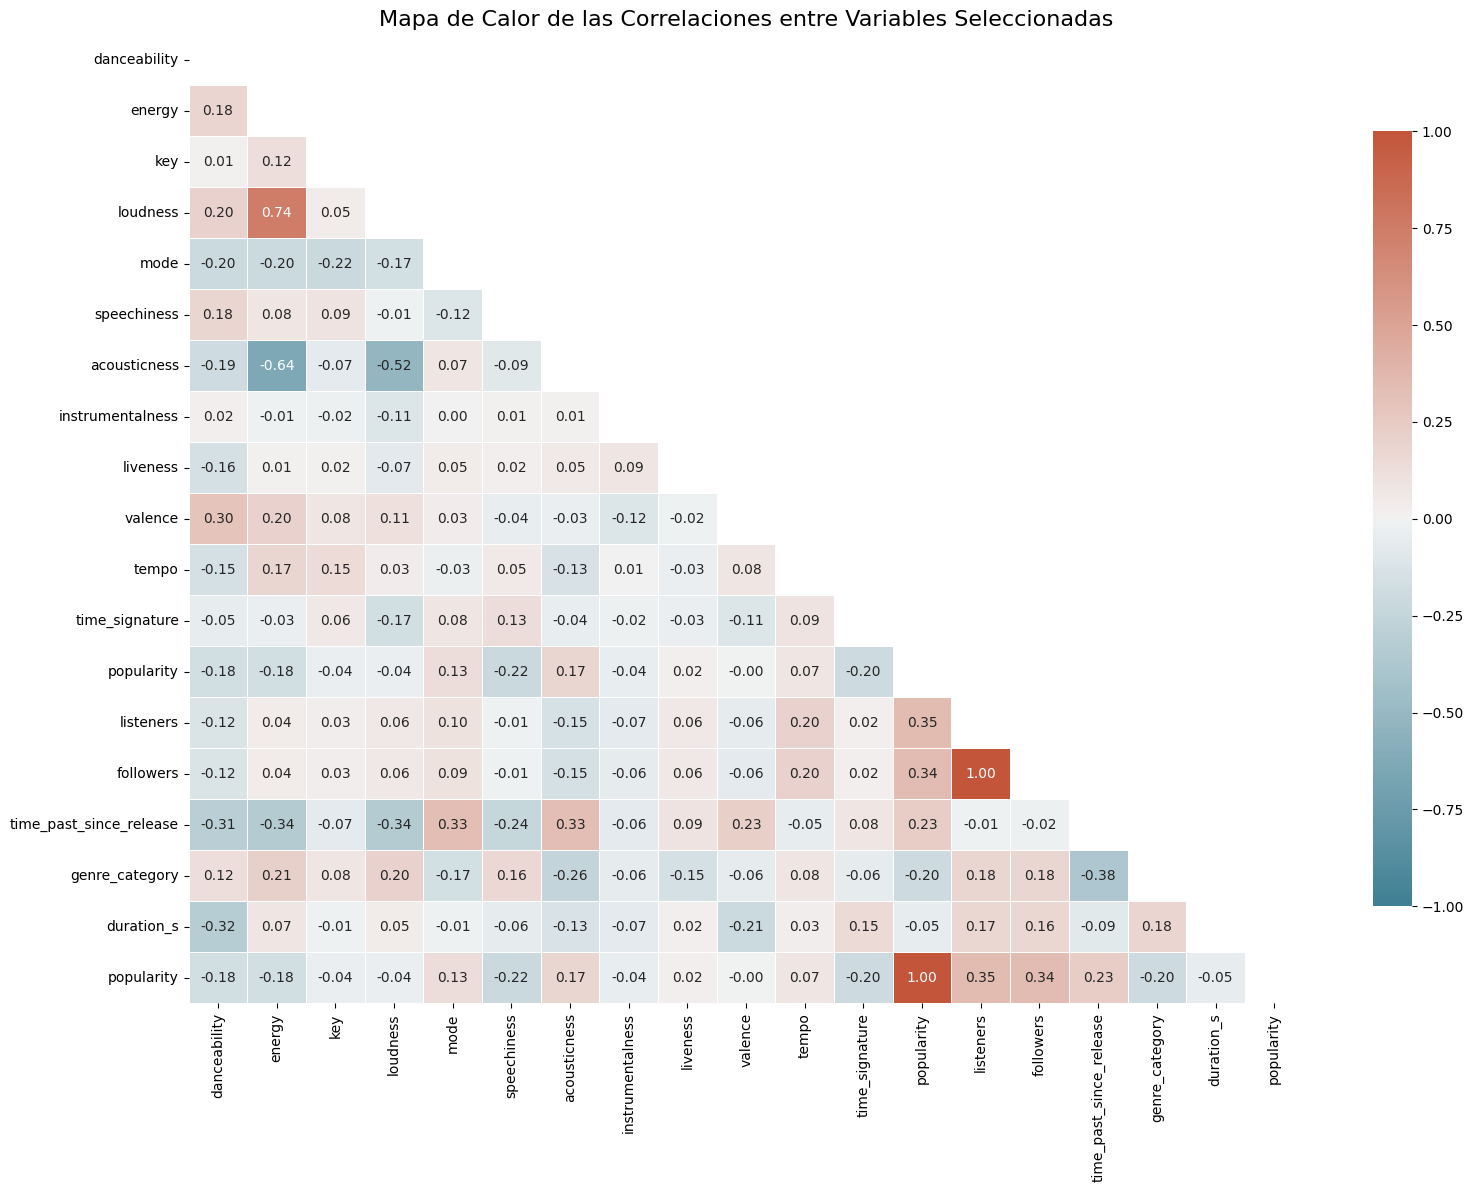

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_RFH = pd.read_csv('/Users/cres/european_countries_songs_popularity_predictions_with_RFH_predictions_K-MEANS.csv')

df_sample = df_RFH.sample(frac=0.9, random_state=42)

columnas = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
            'time_signature', 'popularity', 'listeners', 'followers', 
            'time_past_since_release', 'genre_category', 'duration_s', 'popularity']

df_correlation = df_sample[columnas].select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = df_correlation.corr()

# Ajustar el tamaño de la figura para mejorar la legibilidad
fig, ax = plt.subplots(figsize=(16, 12))

# Crear una máscara para mostrar solo la mitad inferior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Crear el mapa de calor con anotaciones
sns.heatmap(corr_matrix, annot=True, cmap=cmap, mask=mask, vmin=-1, vmax=1, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .8})

plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)

# Título del gráfico
plt.title('Mapa de Calor de las Correlaciones entre Variables Seleccionadas', fontsize=16)

plt.tight_layout(pad=1.0, h_pad=1.0, w_pad=1.0)

plt.savefig('/Users/cres/correlation_heatmap_final.png', dpi=300, bbox_inches='tight')

plt.show()


In [20]:

ruta_archivo_salida = '/Users/cres/european_countries_top_50_final_pre_normalizado.csv'

df.to_csv(ruta_archivo_salida, index=False)


Canciones con ritmo Lento:
      country   track_name                         artist_name   tempo  \
374   Iceland   Það snjóar  Sigurður Guðmundsson, Memfismafían  61.357   
548  Portugal  Ultimamente                              Slow J  62.795   

     popularity                                             genres  
374          42  ['classic icelandic pop', 'icelandic folk', 'i...  
548          61                                   ['hip hop tuga']  


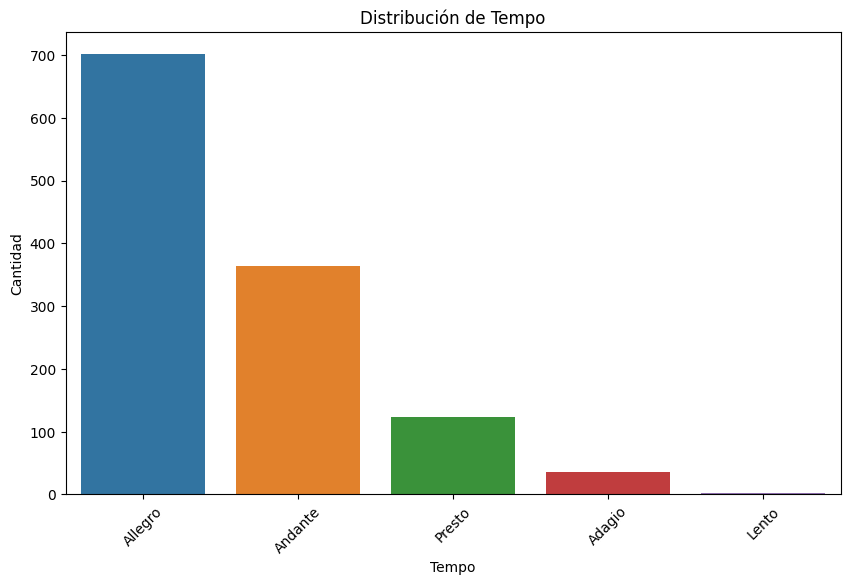

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv')

def tempo_to_rythm(tempo):
    if tempo < 66:
        return 'Lento'
    elif 66 <= tempo < 76:
        return 'Adagio'
    elif 76 <= tempo < 108:
        return 'Andante'
    elif 108 <= tempo < 168:
        return 'Allegro'
    elif 168 <= tempo:
        return 'Presto'

df['rythm'] = df['tempo'].apply(tempo_to_rythm)

slow_songs = df[df['rythm'] == 'Lento']

print("Canciones con ritmo Lento:")
print(slow_songs[['country', 'track_name', 'artist_name', 'tempo', 'popularity', 'genres']])  

plt.figure(figsize=(10, 6))
sns.countplot(x='rythm', data=df, order=df['rythm'].value_counts().index)
plt.title('Distribución de Tempo')
plt.xlabel('Tempo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


/var/folders/y4/4wmzlg8x1t13r4nz7l58dk8w0000gn/T/ipykernel_75470/1029422597.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


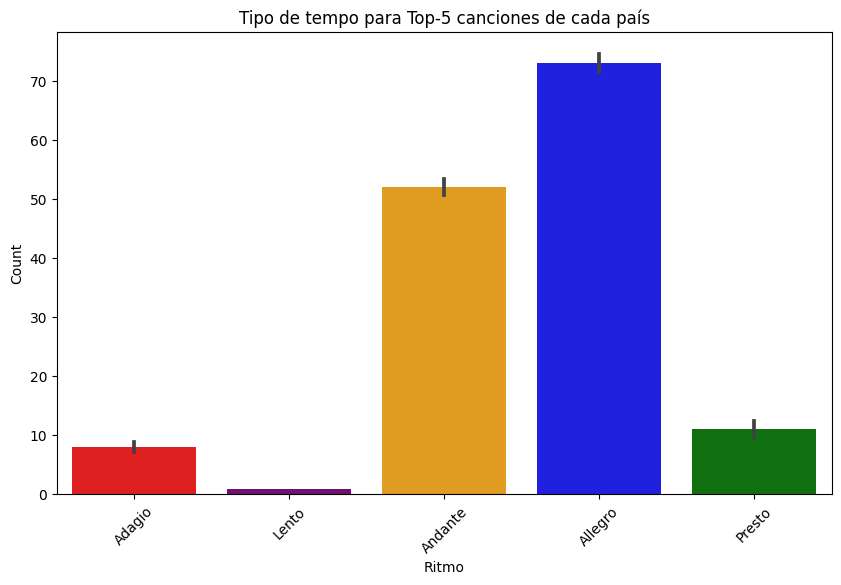

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv')

def tempo_to_rythm(tempo):
    if tempo < 66:
        return 'Lento'
    elif 66 <= tempo < 76:
        return 'Adagio'
    elif 76 <= tempo < 108:
        return 'Andante'
    elif 108 <= tempo < 168:
        return 'Allegro'
    elif 168 <= tempo:
        return 'Presto'

df['rythm'] = df['tempo'].apply(tempo_to_rythm)

top_5_songs_per_country = df.groupby('country').apply(lambda x: x[x['position'] <= 5]).reset_index(drop=True)

colors = {
    'Allegro': 'blue',
    'Andante': 'orange',
    'Presto': 'green',
    'Adagio': 'red',
    'Lento': 'purple'
}

plt.figure(figsize=(10, 6))
sns.barplot(
    x='rythm',
    y='position',
    data=top_5_songs_per_country,
    estimator=lambda x: len(x),  
    ci="sd",  
    order=['Adagio', 'Lento', 'Andante', 'Allegro', 'Presto'],  
    palette=colors 
)
plt.title('Tipo de tempo para Top-5 canciones de cada país')
plt.xlabel('Ritmo')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Porcentaje de canciones en 'Fa#/Sol♭': 19.31%
Porcentaje de canciones en 'Re': 18.62%


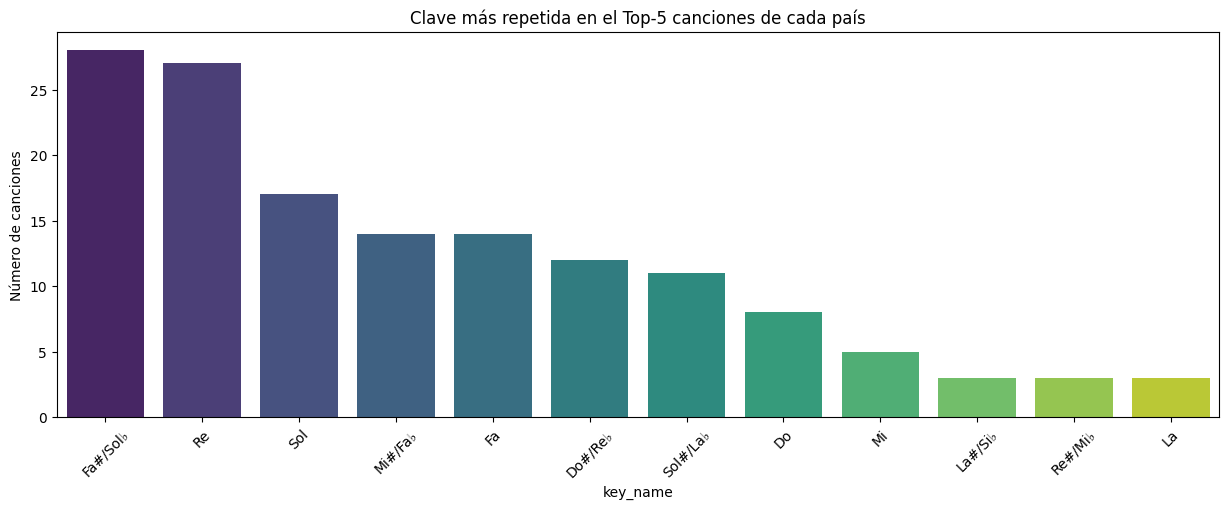

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv')

keys = np.array(['Do', 'Do#/Re♭', 'Re', 'Re#/Mi♭', 'Mi', 'Mi#/Fa♭', 'Fa', 'Fa#/Sol♭', 'Sol', 'Sol#/La♭', 'La', 'La#/Si♭', 'Si', 'No Detectada'])

df['key_name'] = df['key'].apply(lambda x: keys[x] if x >= 0 and x < len(keys) else keys[-1])

top_5_songs_per_country = df[df['position'].between(1, 5)]

keys_count = top_5_songs_per_country['key_name'].value_counts()

fa_sharp_sol_flat_count = keys_count.get('Fa#/Sol♭', 0)
re_count = keys_count.get('Re', 0)
total_count = top_5_songs_per_country.shape[0]
fa_sharp_sol_flat_percentage = (fa_sharp_sol_flat_count / total_count) * 100
re_percentage = (re_count / total_count) * 100

print(f"Porcentaje de canciones en 'Fa#/Sol♭': {fa_sharp_sol_flat_percentage:.2f}%")
print(f"Porcentaje de canciones en 'Re': {re_percentage:.2f}%")

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=keys_count.index, y=keys_count.values, palette="viridis")
ax.set(title="Clave más repetida en el Top-5 canciones de cada país", ylabel="Número de canciones")
plt.xticks(rotation=45)
plt.show()



/var/folders/y4/4wmzlg8x1t13r4nz7l58dk8w0000gn/T/ipykernel_43698/2103660339.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_songs_per_country['size'] = top_5_songs_per_country['position'].apply(lambda x: (6 - x) ** 2 * 10)


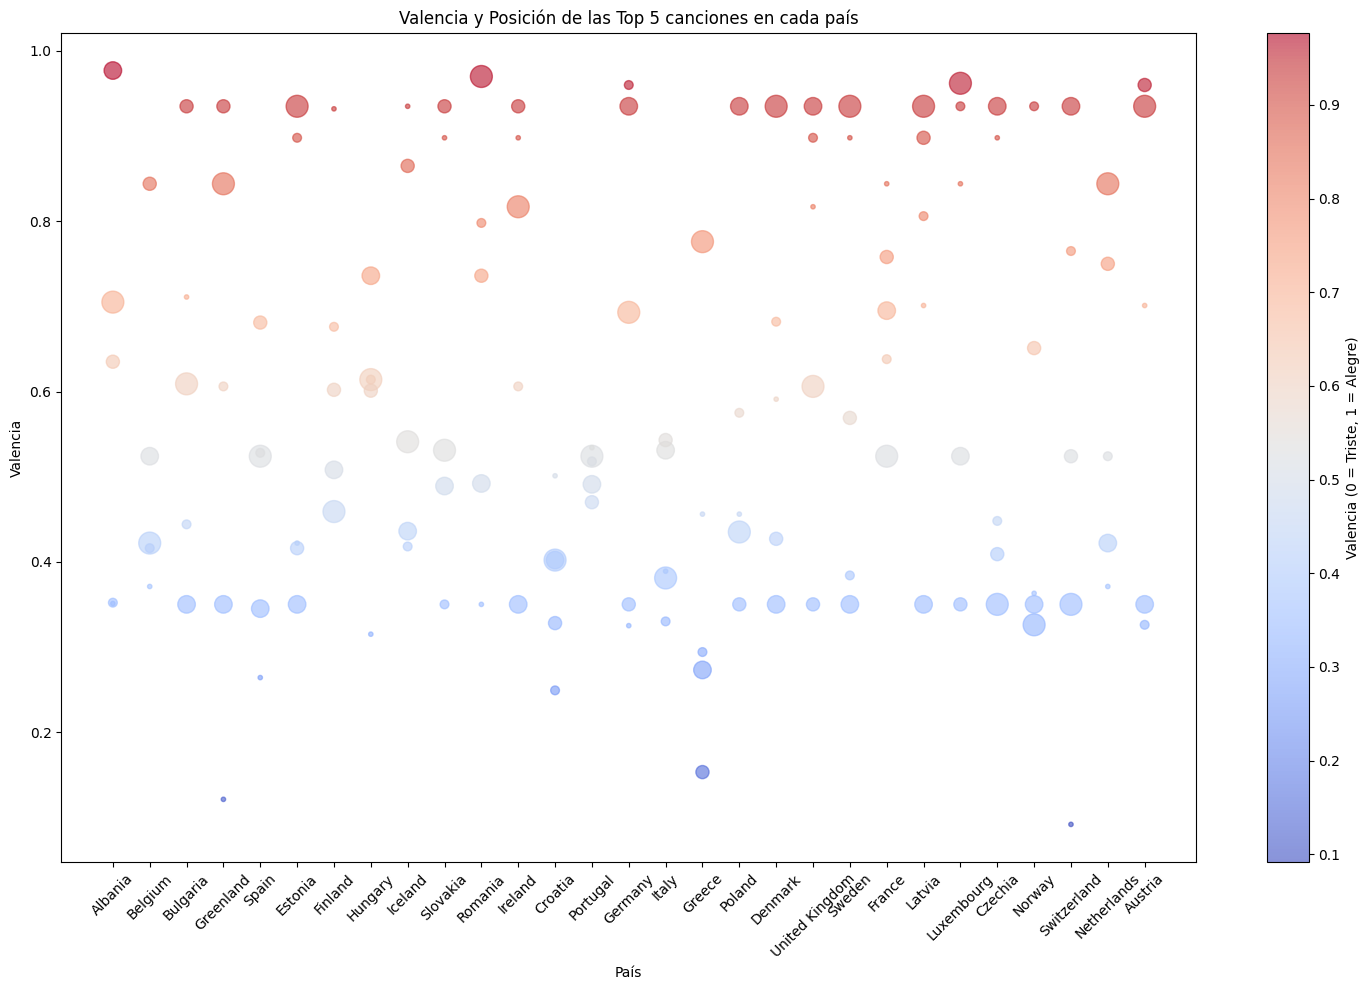

<Figure size 640x480 with 0 Axes>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv')

top_5_songs_per_country = df[df['position'].between(1, 5)]


top_5_songs_per_country['size'] = top_5_songs_per_country['position'].apply(lambda x: (6 - x) ** 2 * 10)

plt.figure(figsize=(15, 10))
scatter = plt.scatter(
    x=top_5_songs_per_country['country'],
    y=top_5_songs_per_country['valence'],
    s=top_5_songs_per_country['size'], 
    c=top_5_songs_per_country['valence'],  
    cmap='coolwarm',  
    alpha=0.6  
)

cbar = plt.colorbar(scatter)
cbar.set_label('Valencia (0 = Triste, 1 = Alegre)')

plt.title('Valencia y Posición de las Top 5 canciones en cada país')
plt.xlabel('País')
plt.ylabel('Valencia')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

plt.savefig('/Users/cres/Distribución-valence-top5-país(2).png')

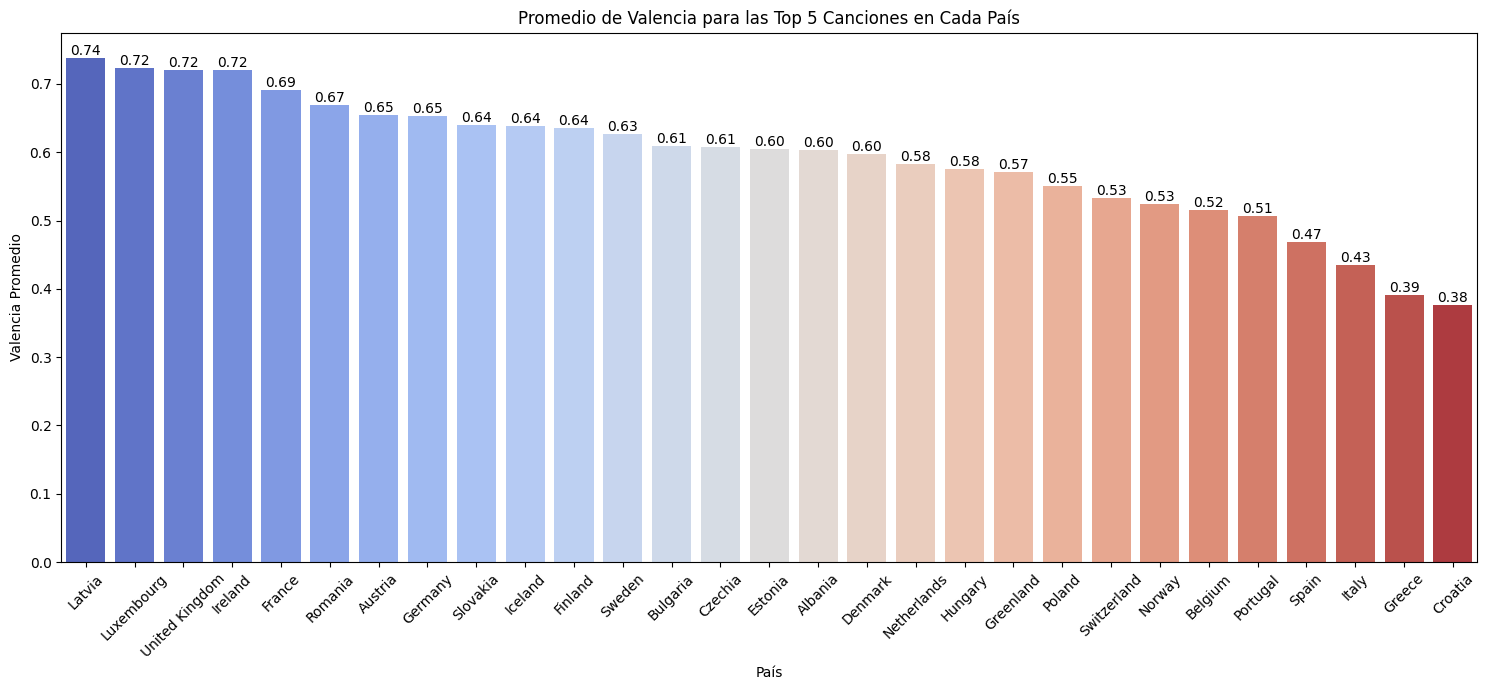

<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv')

df['position'] = pd.to_numeric(df['position'], errors='coerce')
df['valence'] = pd.to_numeric(df['valence'], errors='coerce')

top_5_songs_per_country = df[df['position'].between(1, 5)]

average_valence_per_country = top_5_songs_per_country.groupby('country')['valence'].mean().reset_index()

average_valence_per_country = average_valence_per_country.sort_values('valence', ascending=False)

plt.figure(figsize=(15, 7))
barplot = sns.barplot(
    x='country',
    y='valence',
    data=average_valence_per_country,
    palette='coolwarm'
)

for index, value in enumerate(average_valence_per_country['valence']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('Promedio de Valencia para las Top 5 Canciones en Cada País')
plt.xlabel('País')
plt.ylabel('Valencia Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('/Users/cres/Distribución-valence-top5-país.png')


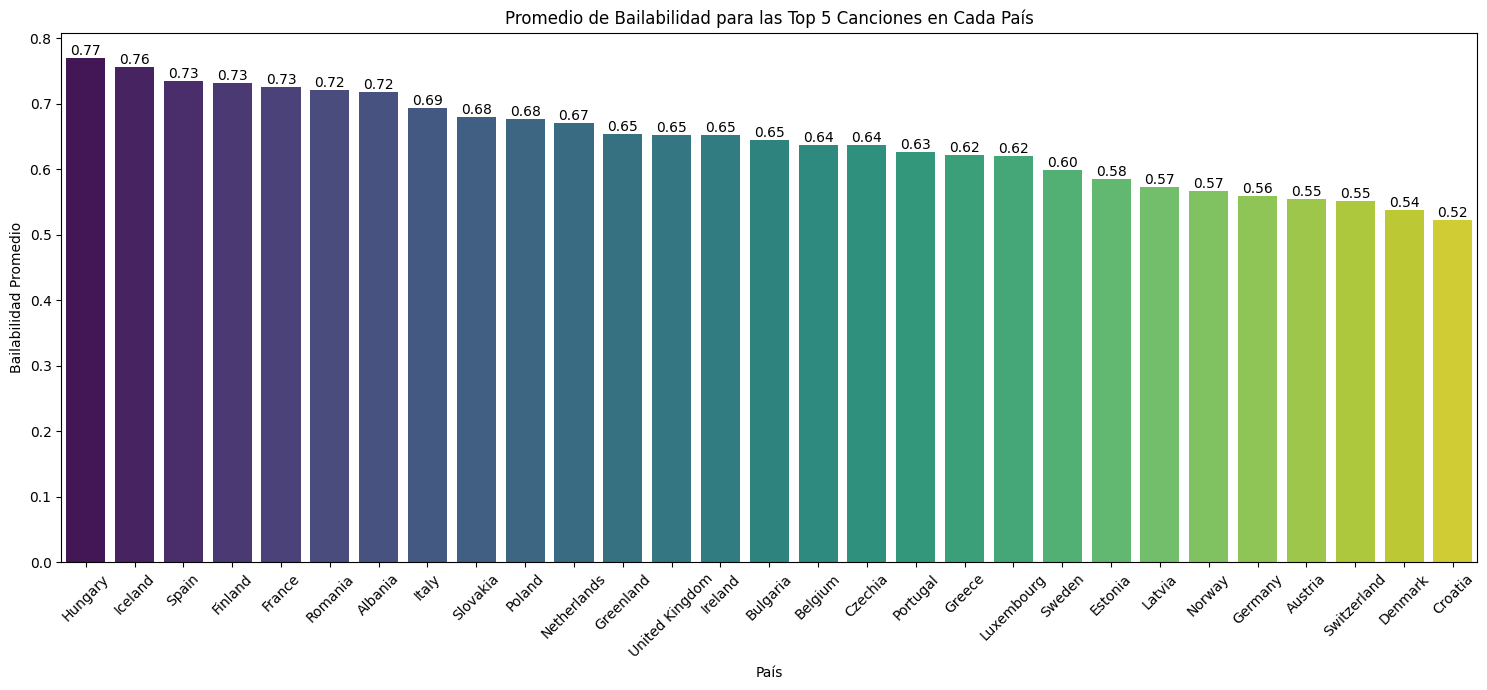

<Figure size 640x480 with 0 Axes>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv')

df['position'] = pd.to_numeric(df['position'], errors='coerce')
df['danceability'] = pd.to_numeric(df['danceability'], errors='coerce')

top_5_songs_per_country = df[df['position'].between(1, 5)]

average_danceability_per_country = top_5_songs_per_country.groupby('country')['danceability'].mean().reset_index()

average_danceability_per_country = average_danceability_per_country.sort_values('danceability', ascending=False)

plt.figure(figsize=(15, 7))
barplot = sns.barplot(
    x='country',
    y='danceability',
    data=average_danceability_per_country,
    palette='viridis'
)

for index, value in enumerate(average_danceability_per_country['danceability']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('Promedio de Bailabilidad para las Top 5 Canciones en Cada País')
plt.xlabel('País')
plt.ylabel('Bailabilidad Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('/Users/cres/Distribución-danceability-top5-país.png')

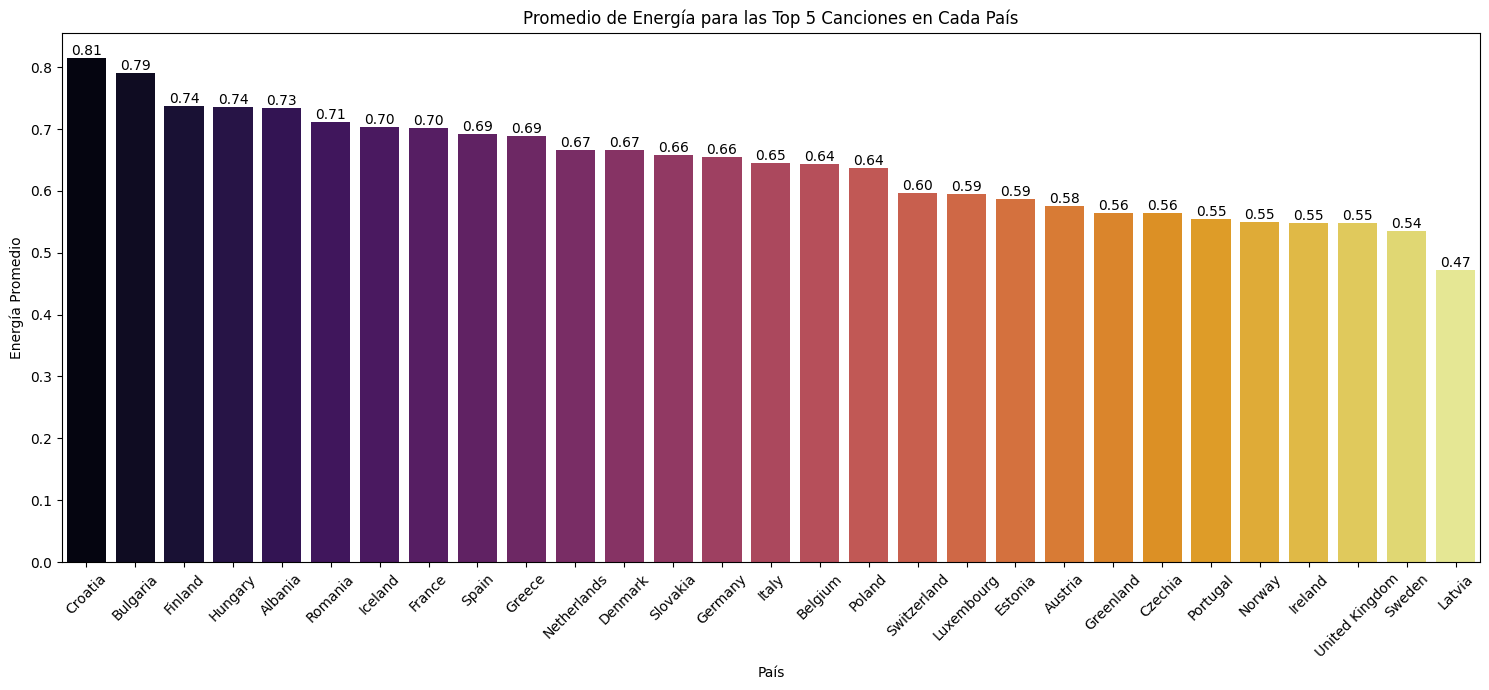

<Figure size 640x480 with 0 Axes>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv')

df['position'] = pd.to_numeric(df['position'], errors='coerce')
df['energy'] = pd.to_numeric(df['energy'], errors='coerce')

top_5_songs_per_country = df[df['position'].between(1, 5)]

average_energy_per_country = top_5_songs_per_country.groupby('country')['energy'].mean().reset_index()

average_energy_per_country = average_energy_per_country.sort_values('energy', ascending=False)

plt.figure(figsize=(15, 7))
barplot = sns.barplot(
    x='country',
    y='energy',
    data=average_energy_per_country,
    palette='inferno'
)

for index, value in enumerate(average_energy_per_country['energy']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('Promedio de Energía para las Top 5 Canciones en Cada País')
plt.xlabel('País')
plt.ylabel('Energía Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('/Users/cres/Distribución-energy-top5-país.png')

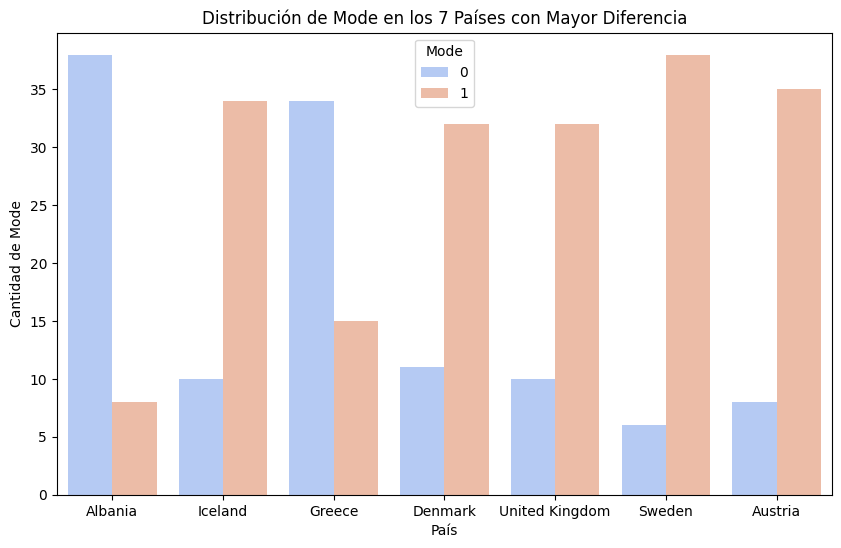

Valores máximos de mode=0 y mode=1:
mode
0       38
1       38
diff    32
dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv')

df['mode'] = pd.to_numeric(df['mode'], errors='coerce').astype('category')

mode_counts = df.groupby(['country', 'mode']).size().reset_index(name='count')

mode_diff = mode_counts.pivot(index='country', columns='mode', values='count')
mode_diff['diff'] = abs(mode_diff[0] - mode_diff[1])
top_countries = mode_diff.nlargest(7, 'diff').index

filtered_df = df[df['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.countplot(x='country', hue='mode', data=filtered_df, palette='coolwarm')
plt.title('Distribución de Mode en los 7 Países con Mayor Diferencia')
plt.xlabel('País')
plt.ylabel('Cantidad de Mode')
plt.legend(title='Mode')
plt.show()

print("Valores máximos de mode=0 y mode=1:")
print(mode_diff.max())


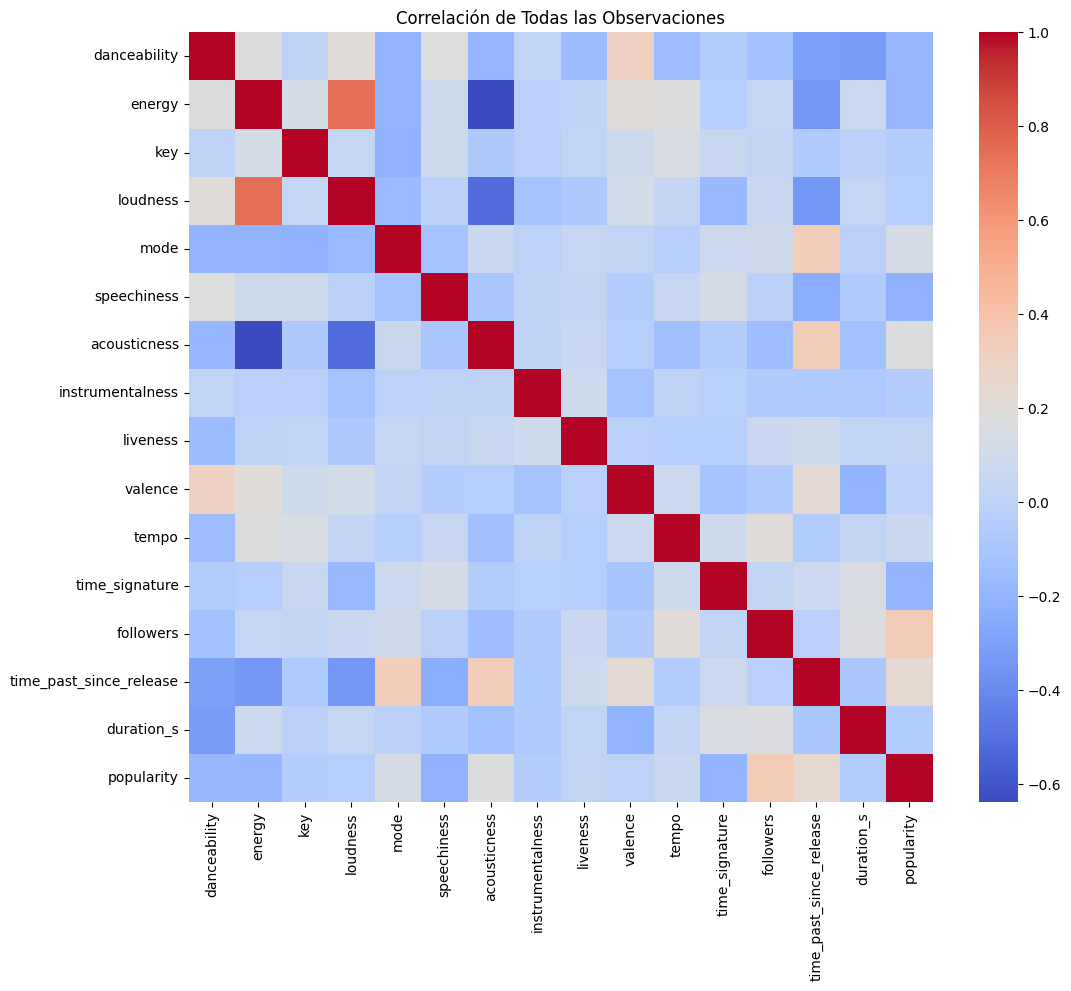

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_RFH = pd.read_csv('/Users/cres/european_countries_songs_popularity_predictions_with_RFH_predictions_K-MEANS.csv')

df_sample = df_RFH.sample(frac=0.9, random_state=42)

predictores = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
               'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
               'time_signature', 'followers', 'time_past_since_release', 'duration_s', 'popularity']

corr_all = df_sample[predictores].corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(corr_all, annot=False, cmap='coolwarm')
plt.title('Correlación de Todas las Observaciones')

plt.savefig('/Users/cres/correlation_heatmap.jpg') 

plt.show()


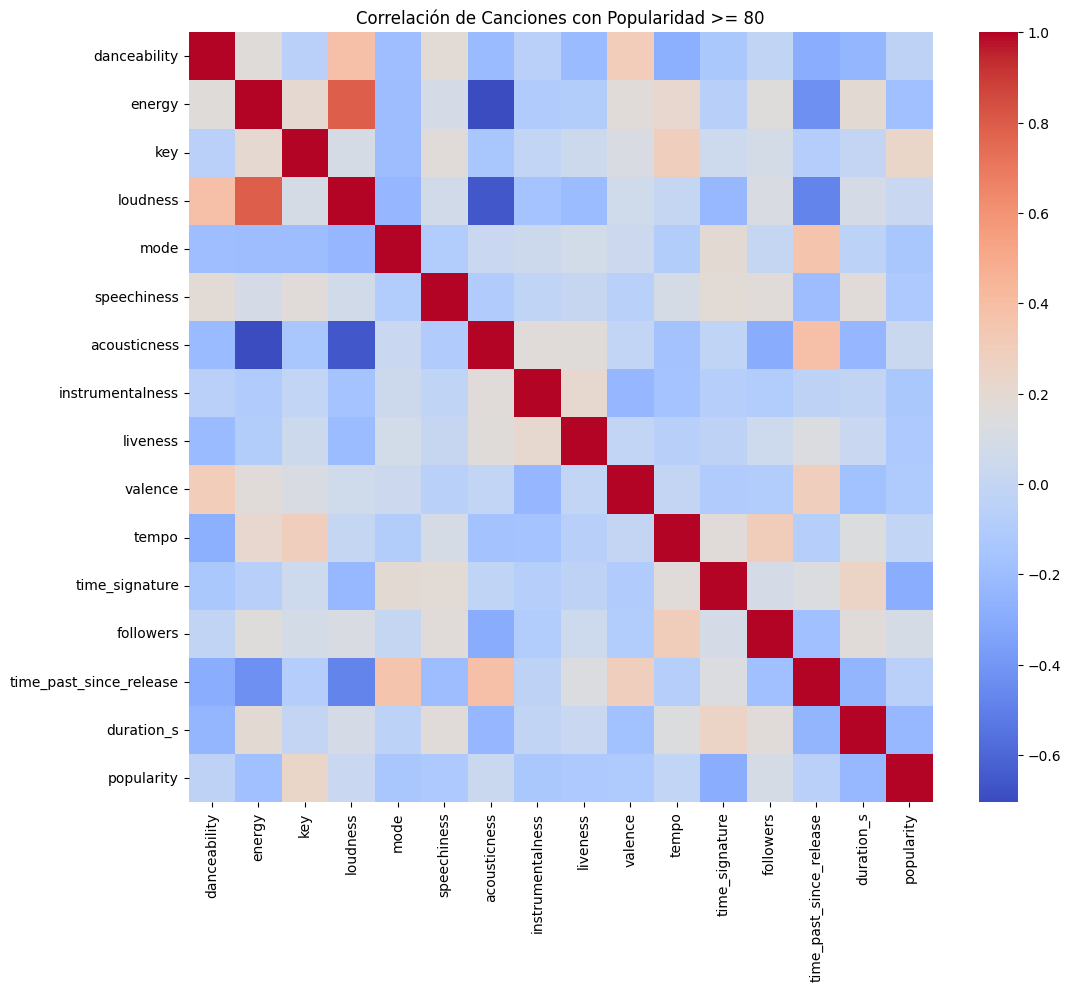

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_RFH = pd.read_csv('/Users/cres/european_countries_songs_popularity_predictions_with_RFH_predictions_K-MEANS.csv')

# Filtrar para popularidad >= 80
df_high_popularity = df_RFH[df_RFH['popularity'] >= 80]

predictores = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
               'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
               'time_signature', 'followers', 'time_past_since_release', 'duration_s', 'popularity']

# Calcular la matriz de correlación para canciones con popularidad >= 80
corr_high_popularity = df_high_popularity[predictores].corr()

# Crear el mapa de calor para canciones con popularidad >= 80
plt.figure(figsize=(12, 10))  
sns.heatmap(corr_high_popularity, annot=False, cmap='coolwarm')
plt.title('Correlación de Canciones con Popularidad >= 80')

plt.savefig('/Users/cres/correlation_heatmap_popularity_80.jpg')  

plt.show()


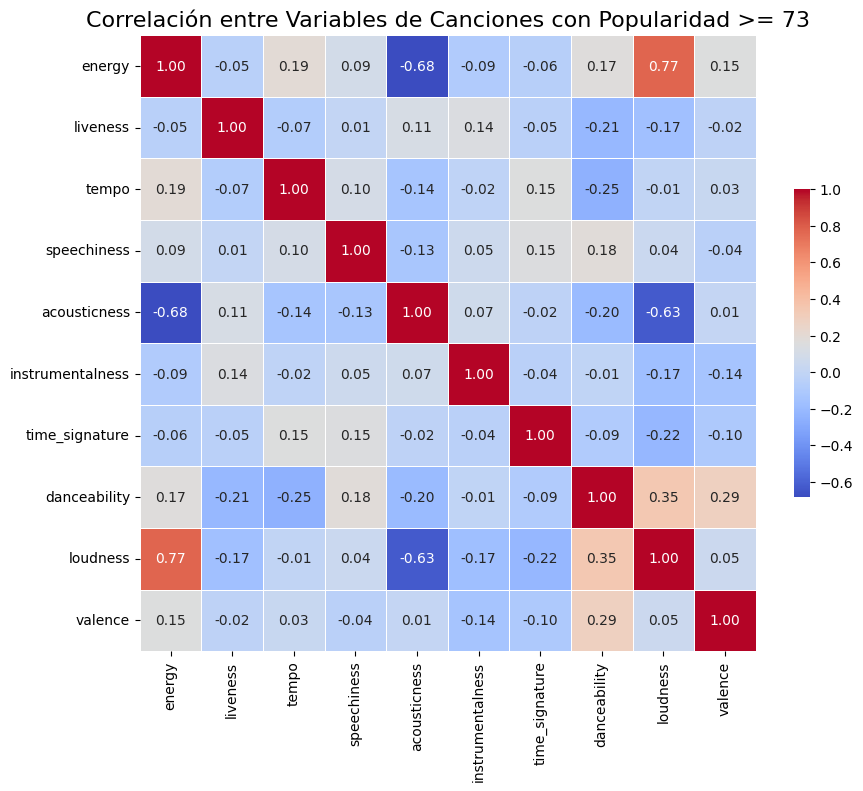

Sorted list of correlations from highest to lowest without duplicates:
loudness           energy             0.773358
danceability       loudness           0.345006
danceability       valence            0.288787
tempo              energy             0.191250
danceability       speechiness        0.179775
danceability       energy             0.165428
tempo              time_signature     0.154132
energy             valence            0.153841
speechiness        time_signature     0.147418
instrumentalness   liveness           0.141430
acousticness       liveness           0.113535
speechiness        tempo              0.103239
speechiness        energy             0.086171
instrumentalness   acousticness       0.069828
instrumentalness   speechiness        0.054800
loudness           valence            0.048266
loudness           speechiness        0.044136
valence            tempo              0.032767
acousticness       valence            0.012690
liveness           speechiness      

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_RFH = pd.read_csv('/Users/cres/european_countries_songs_popularity_predictions_with_RFH_predictions_K-MEANS.csv')

df_popular_songs = df_RFH[df_RFH['popularity'] >= 73]

important_features = ['energy', 'liveness', 'tempo', 'speechiness', 
                      'acousticness', 'instrumentalness', 'time_signature', 
                      'danceability', 'loudness', 'valence']

df_important = df_popular_songs[important_features]

corr_matrix = df_important.corr()

corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)

corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
corr_pairs = corr_pairs[~corr_pairs.index.duplicated(keep='first')]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .5}, square=True)

plt.title('Correlación entre Variables de Canciones con Popularidad >= 73', fontsize=16)

plt.show()

print("Sorted list of correlations from highest to lowest without duplicates:")
for index, (pair, corr_value) in enumerate(corr_pairs.items()):
    if index % 2 == 0:
        print(f"{pair[0]:<18} {pair[1]:<18} {corr_value:.6f}")


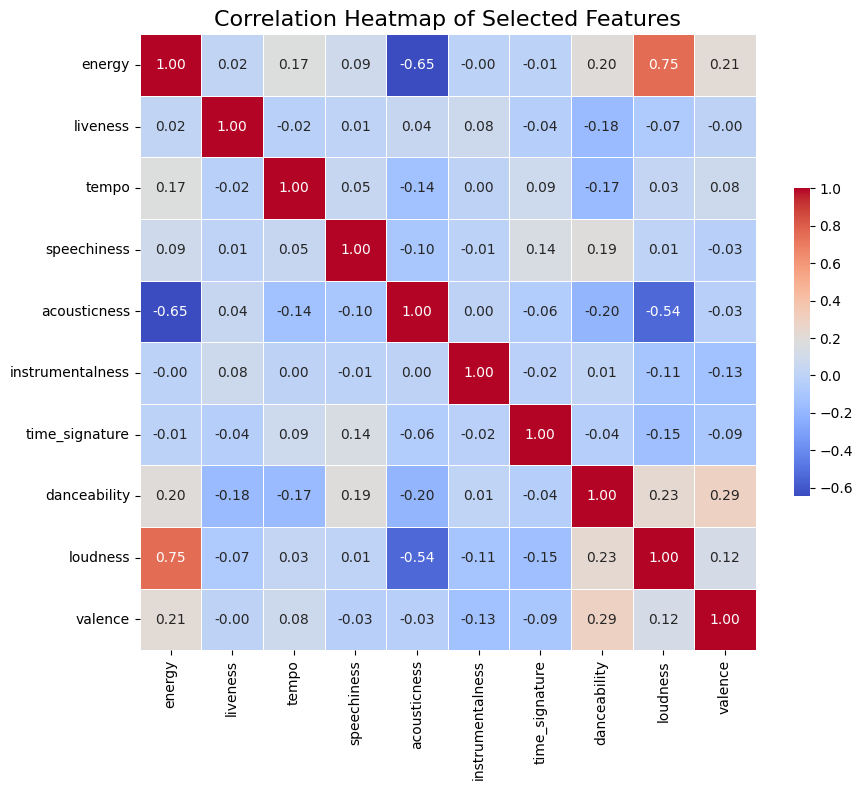

Sorted list of correlations from highest to lowest without duplicates:
loudness           energy             0.750584
acousticness       loudness           -0.537500
danceability       loudness           0.234520
acousticness       danceability       -0.204265
speechiness        danceability       0.185658
energy             tempo              0.174274
time_signature     loudness           -0.149705
acousticness       tempo              -0.135839
loudness           valence            0.121797
acousticness       speechiness        -0.100564
speechiness        energy             0.091352
tempo              valence            0.080188
loudness           liveness           -0.071603
speechiness        tempo              0.045693
danceability       time_signature     -0.037423
valence            acousticness       -0.033161
loudness           tempo              0.030508
energy             liveness           0.022084
instrumentalness   danceability       0.010653
instrumentalness   speechine

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_RFH = pd.read_csv('/Users/cres/european_countries_songs_popularity_predictions_with_RFH_predictions_K-MEANS.csv')

important_features = ['energy', 'liveness', 'tempo', 'speechiness',
                      'acousticness', 'instrumentalness', 'time_signature',
                      'danceability', 'loudness', 'valence']

df_important = df_RFH[important_features]

corr_matrix = df_important.corr()

corr_pairs = corr_matrix.unstack().sort_values(key=abs, ascending=False)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

corr_pairs = corr_pairs.drop_duplicates()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .5}, square=True)

plt.title('Correlation Heatmap of Selected Features', fontsize=16)

plt.show()

print("Sorted list of correlations from highest to lowest without duplicates:")
for index, (pair, corr_value) in enumerate(corr_pairs.items()):
    if index % 2 == 0:
        print(f"{pair[0]:<18} {pair[1]:<18} {corr_value:.6f}")


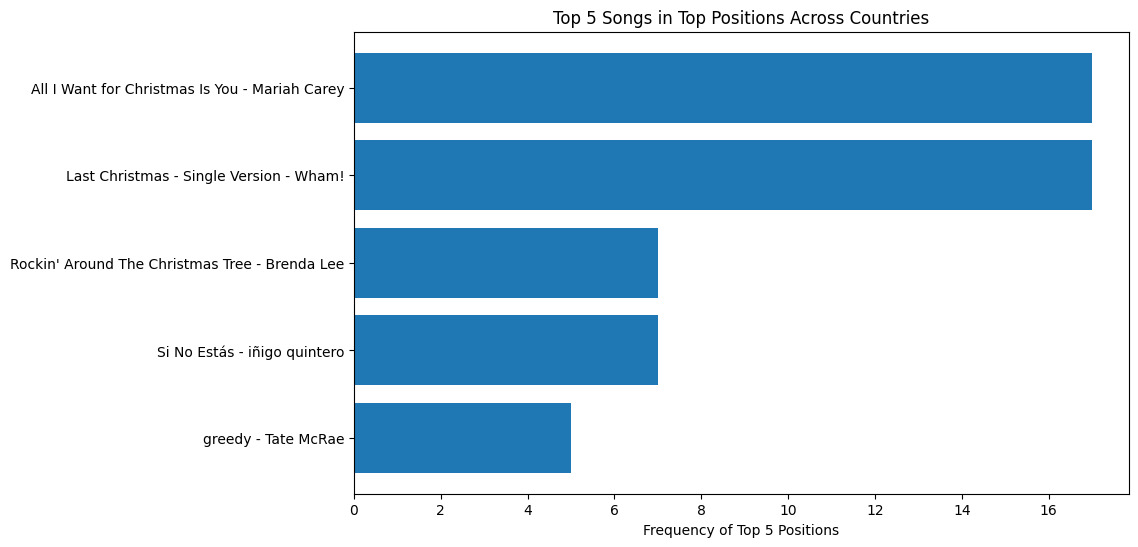

                           track_name     artist_name  counts
5     All I Want for Christmas Is You    Mariah Carey      17
36    Last Christmas - Single Version           Wham!      17
55  Rockin' Around The Christmas Tree      Brenda Lee       7
62                        Si No Estás  iñigo quintero       7
81                             greedy      Tate McRae       5


In [19]:
## CÓDIGO PARA IDENTIFICAR CUALES SON LAS 5 CANCIONES QUE MÁS SE REPITEN EN LOS PRIMEROS 5 POSICIONES DE LOS DISTINTOS PAÍSES

import pandas as pd

df = pd.read_csv('/Users/cres/european_countries_songs_popularity_predictions_with_RFH_predictions_K-MEANS.csv')

top_positions = df[df['position'] <= 5]

top_songs = top_positions.groupby(['track_name', 'artist_name']).size().reset_index(name='counts')

top_songs = top_songs.sort_values(by='counts', ascending=False).head(5)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_songs['track_name'] + ' - ' + top_songs['artist_name'], top_songs['counts'])
plt.xlabel('Frequency of Top 5 Positions')
plt.title('Top 5 Songs in Top Positions Across Countries')
plt.gca().invert_yaxis()  
plt.show()

print(top_songs)


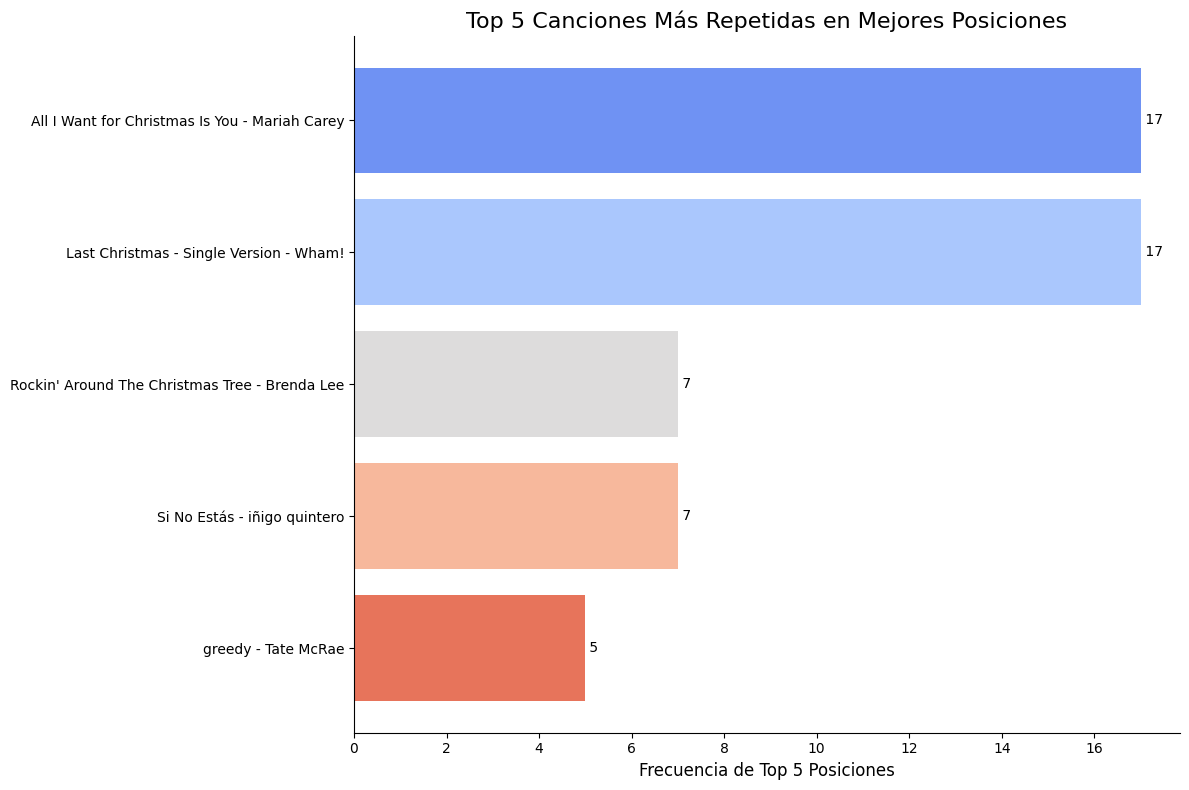

                           track_name     artist_name  counts
5     All I Want for Christmas Is You    Mariah Carey      17
36    Last Christmas - Single Version           Wham!      17
55  Rockin' Around The Christmas Tree      Brenda Lee       7
62                        Si No Estás  iñigo quintero       7
81                             greedy      Tate McRae       5


In [32]:
## CÓDIGO PARA IDENTIFICAR CUALES SON LAS 5 CANCIONES QUE MÁS SE REPITEN EN LOS PRIMEROS 5 POSICIONES DE LOS DISTINTOS PAÍSES (II)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/cres/european_countries_songs_popularity_predictions_with_RFH_predictions_K-MEANS.csv')

top_positions = df[df['position'] <= 5]

top_songs = top_positions.groupby(['track_name', 'artist_name']).size().reset_index(name='counts')

top_songs = top_songs.sort_values(by='counts', ascending=False).head(5)

colors = sns.color_palette('coolwarm', n_colors=len(top_songs))

plt.figure(figsize=(12, 8))
bars = plt.barh(top_songs['track_name'] + ' - ' + top_songs['artist_name'], top_songs['counts'], color=colors)

for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f' {bar.get_width()}', 
        va='center', 
        ha='left', 
        color='black', 
        fontsize=10
    )

plt.xlabel('Frecuencia de Top 5 Posiciones', fontsize=12)
plt.title('Top 5 Songs in Top Positions Across Countries', fontsize=16)
plt.title('Top 5 Canciones Más Repetidas en Mejores Posiciones', fontsize=16)

plt.gca().invert_yaxis()

sns.despine()

plt.tight_layout()
plt.show()

print(top_songs)

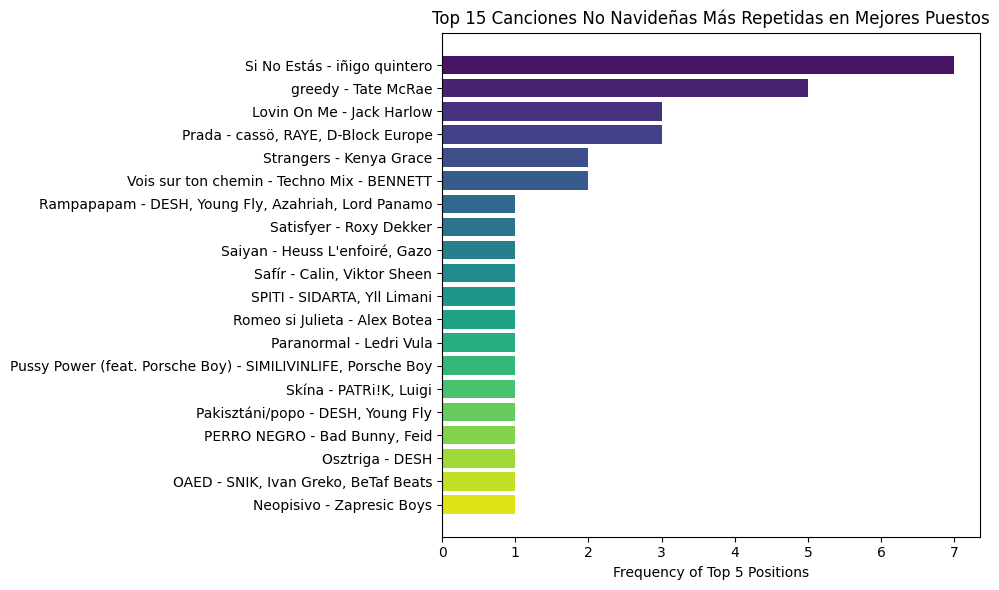

                          track_name                             artist_name  \
56                       Si No Estás                          iñigo quintero   
73                            greedy                              Tate McRae   
36                       Lovin On Me                             Jack Harlow   
48                             Prada             cassö, RAYE, D-Block Europe   
59                         Strangers                             Kenya Grace   
70  Vois sur ton chemin - Techno Mix                                 BENNETT   
50                        Rampapapam  DESH, Young Fly, Azahriah, Lord Panamo   
55                         Satisfyer                             Roxy Dekker   
54                            Saiyan                   Heuss L'enfoiré, Gazo   
53                             Safír                     Calin, Viktor Sheen   
52                             SPITI                     SIDARTA, Yll Limani   
51                  Romeo si Julieta    

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/cres/european_countries_songs_popularity_predictions_with_RFH_predictions_K-MEANS.csv')

christmas_keywords = ['christmas', 'santa', 'holiday', 'navidad', 'xmas', 'noel', 'tree', 'Snow', 'Stick']

df['track_name_lower'] = df['track_name'].str.lower()

non_christmas_songs = df[~df['track_name_lower'].str.contains('|'.join(christmas_keywords), case=False, na=False)]

top_positions = non_christmas_songs[non_christmas_songs['position'] <= 5]

top_songs = top_positions.groupby(['track_name', 'artist_name']).size().reset_index(name='counts')

top_songs = top_songs.sort_values(by='counts', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_songs['track_name'] + ' - ' + top_songs['artist_name'], top_songs['counts'], color=sns.color_palette("viridis", len(top_songs)))
plt.xlabel('Frequency of Top 5 Positions')
plt.title('Top 15 Canciones No Navideñas Más Repetidas en Mejores Puestos')
plt.gca().invert_yaxis() 
plt.tight_layout() 
plt.show()

print(top_songs)


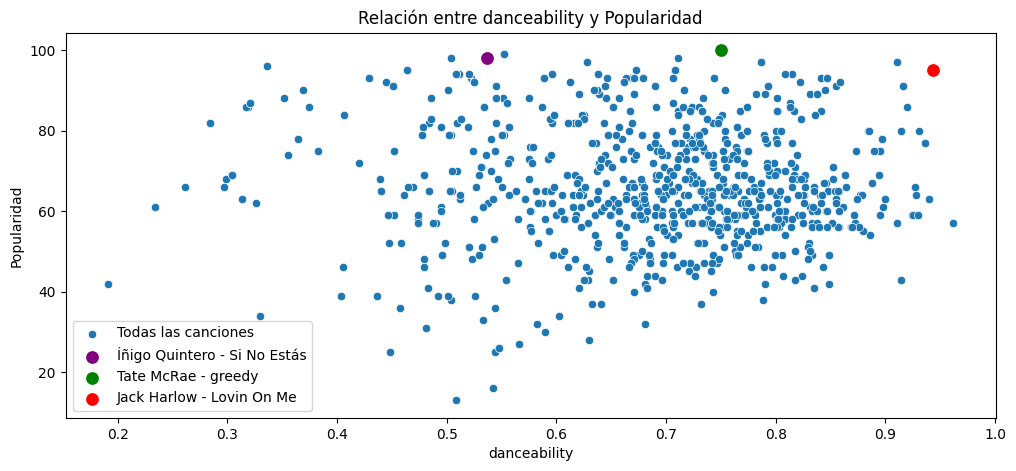

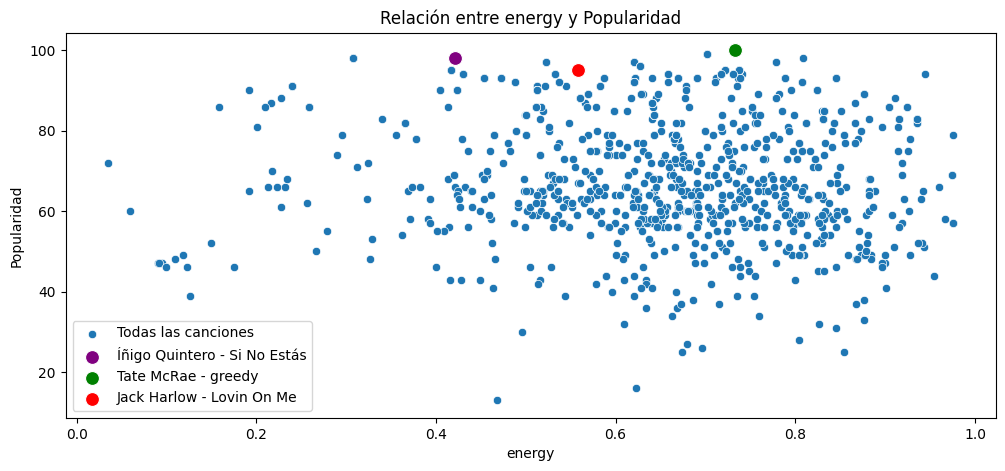

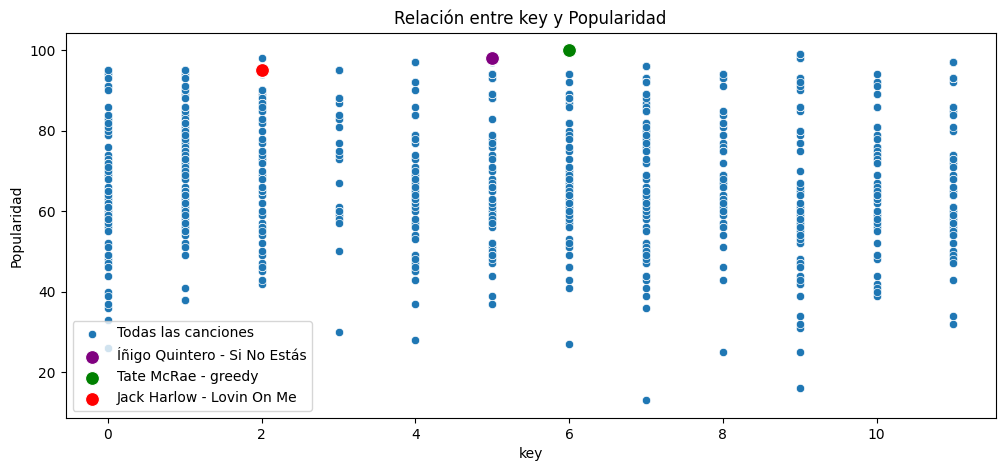

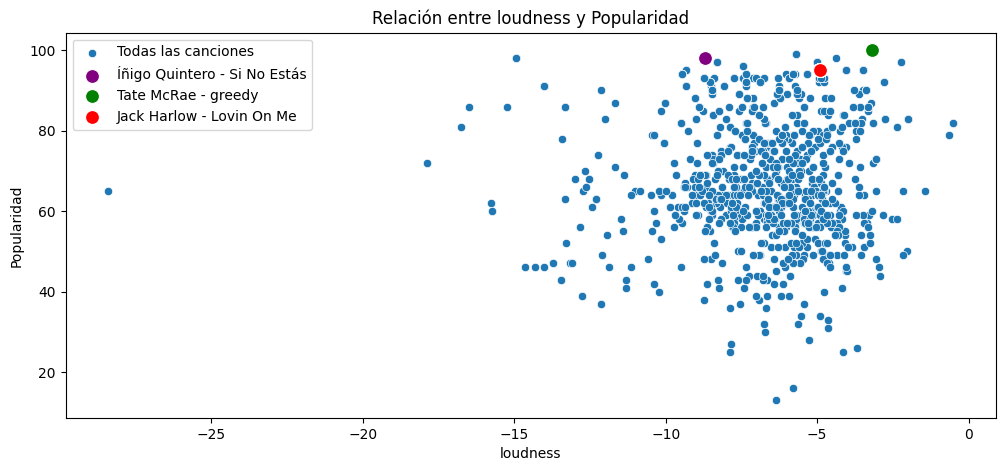

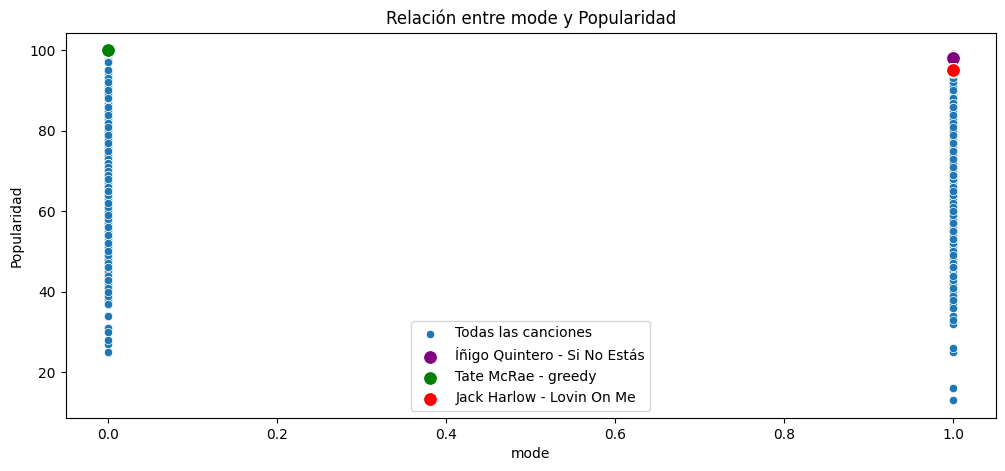

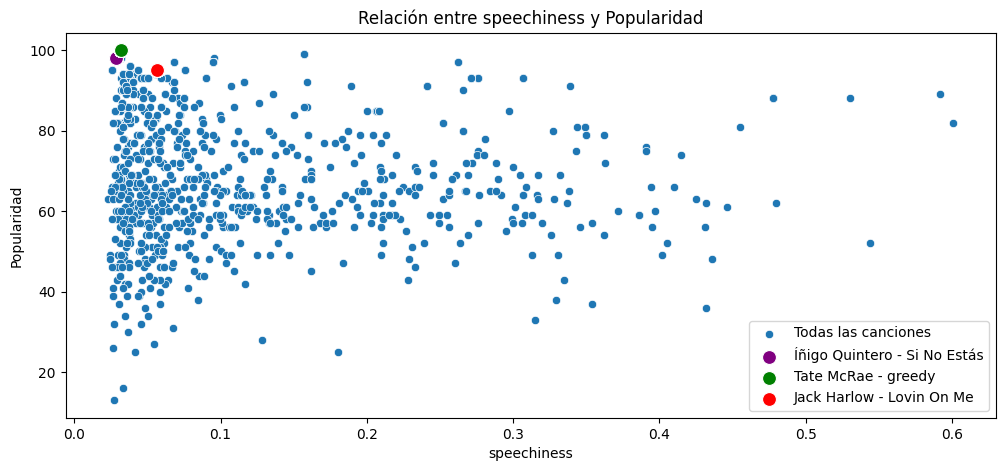

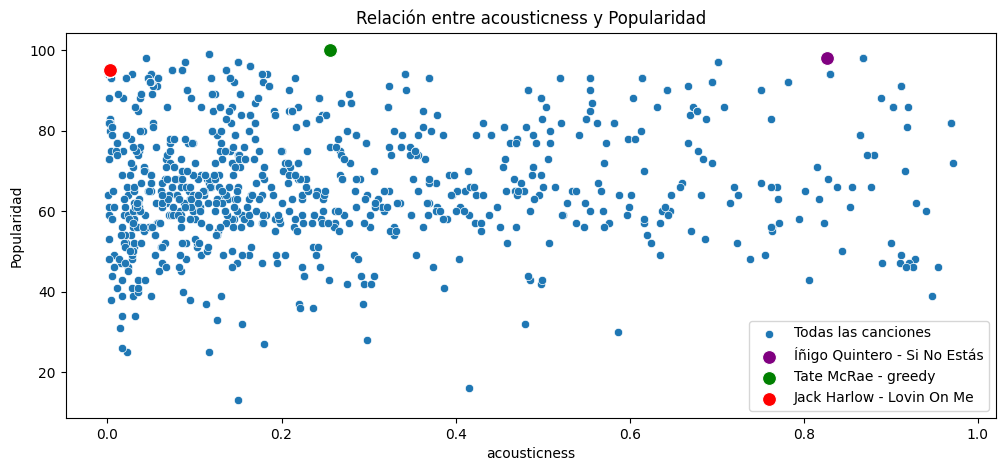

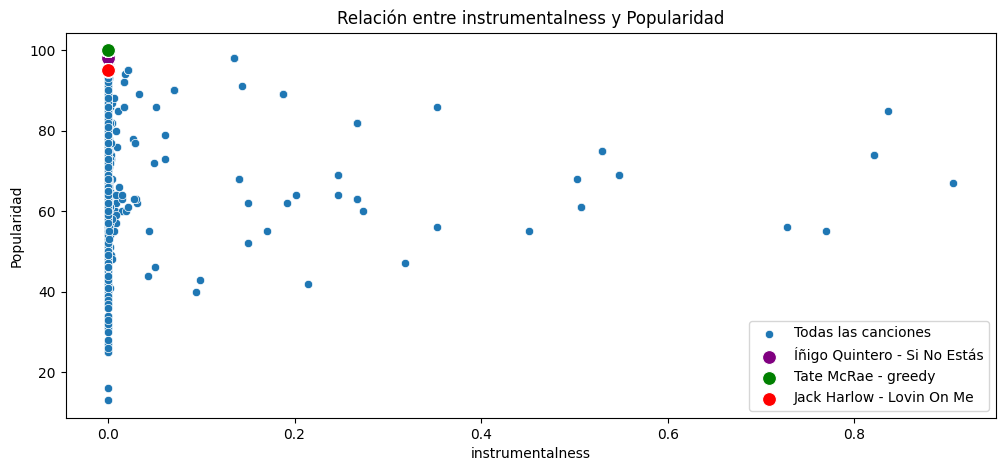

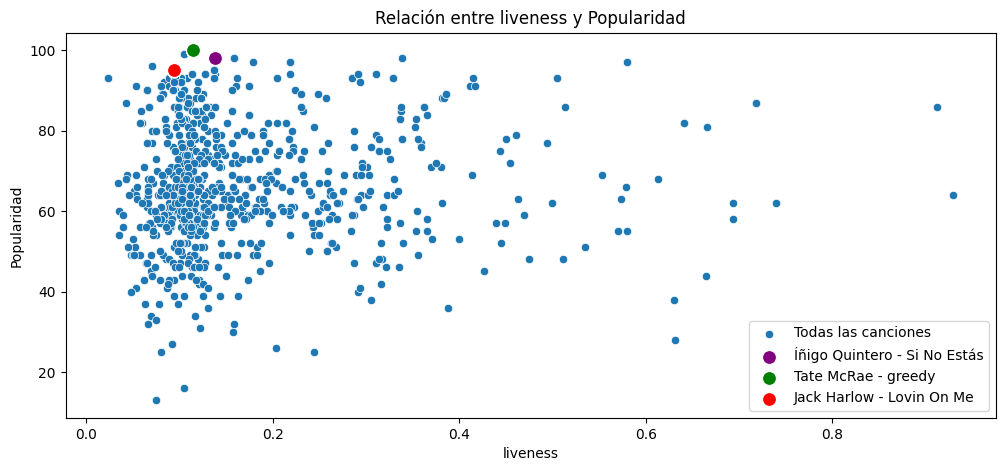

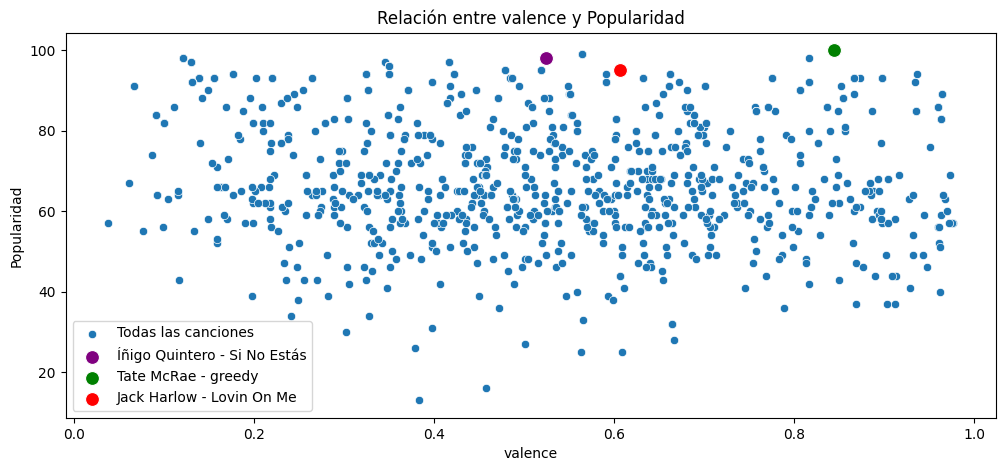

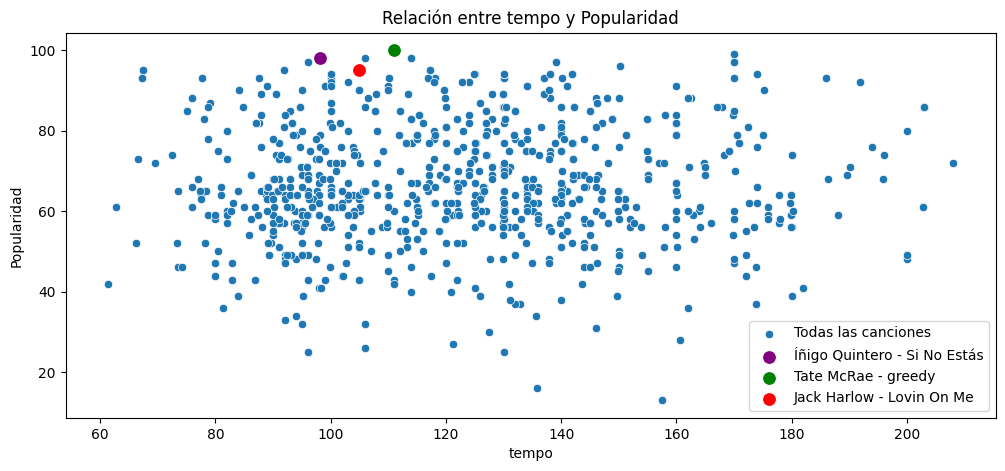

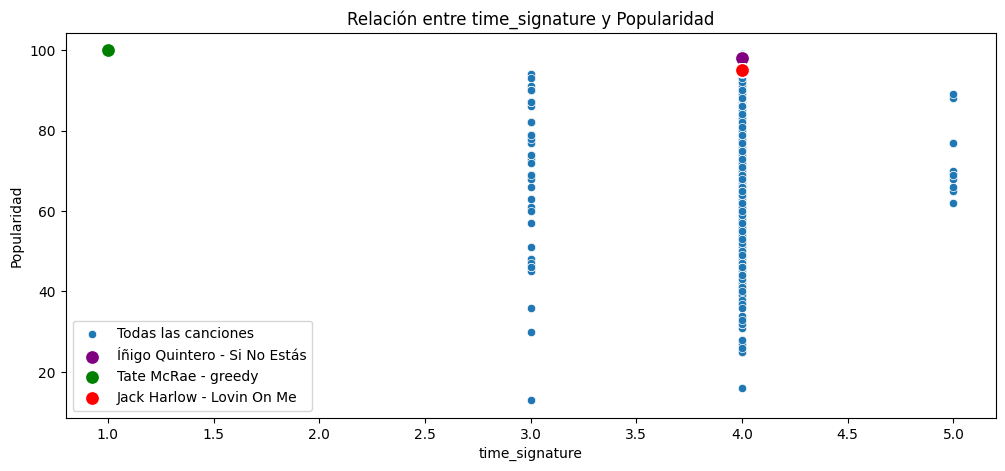

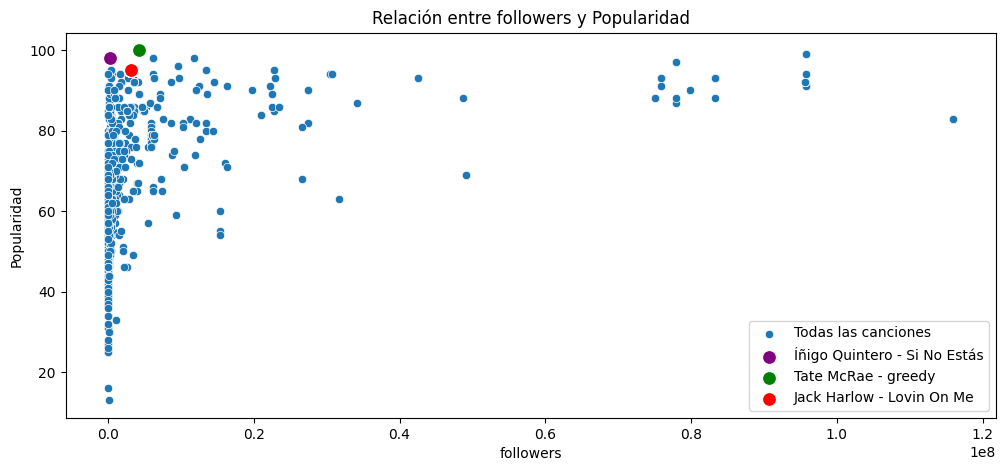

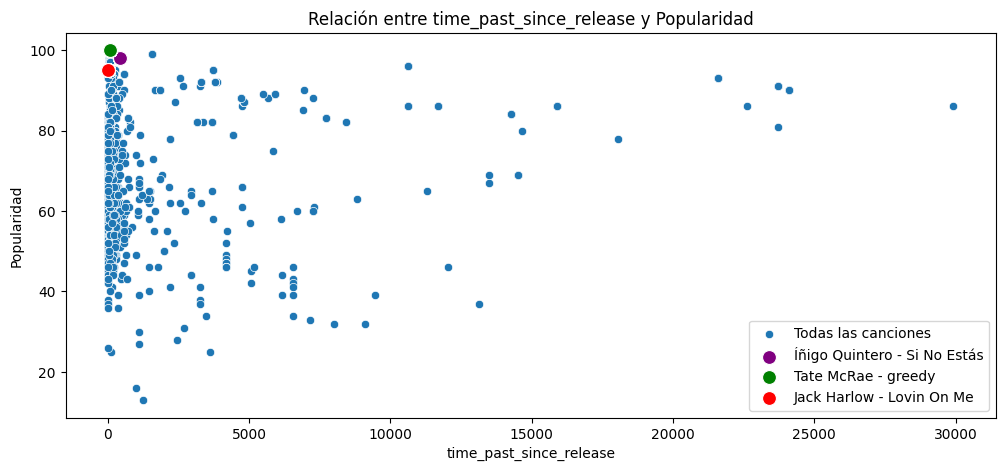

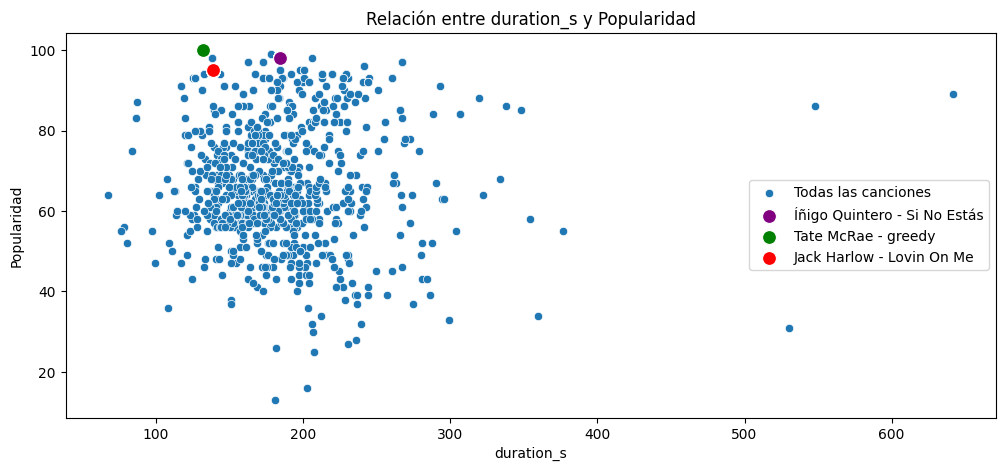

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/cres/european_countries_top_50_final_pre_normalizado.csv')

variables = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
             'time_signature', 'followers', 'time_past_since_release', 'duration_s']

song_inigo_quintero = df[(df['artist_name'] == 'iñigo quintero') & (df['track_name'] == 'Si No Estás')]
song_tate_mcrae = df[(df['artist_name'] == 'Tate McRae') & (df['track_name'] == 'greedy')]
song_jack_harlow = df[(df['artist_name'] == 'Jack Harlow') & (df['track_name'] == 'Lovin On Me')]

# Tamaño aumentado para los puntos específicos
point_size = 100 

# Crear gráficas para cada variable en la lista
for variable in variables:
    plt.figure(figsize=(12, 5))
    
    sns.scatterplot(x=variable, y='popularity', data=df, label='Todas las canciones')
    # Resaltar las canciones específicas
    sns.scatterplot(x=variable, y='popularity', data=song_inigo_quintero, color='purple', label='Íñigo Quintero - Si No Estás', s=point_size)
    sns.scatterplot(x=variable, y='popularity', data=song_tate_mcrae, color='green', label='Tate McRae - greedy', s=point_size)
    sns.scatterplot(x=variable, y='popularity', data=song_jack_harlow, color='red', label='Jack Harlow - Lovin On Me', s=point_size)
    plt.title(f'Relación entre {variable} y Popularidad')
    plt.xlabel(variable)
    plt.ylabel('Popularidad')
    plt.legend()
    plt.show()
